In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_mem_available = pd.read_csv("baseline/mem_available.csv")
df_baseline_mem_cache = pd.read_csv("baseline/mem_cache.csv")
df_baseline_mem_util = pd.read_csv("baseline/mem_util.csv")

# Load CPU STRESS datasets
df_cpustress_mem_available = pd.read_csv("cpu stress/mem_available.csv")
df_cpustress_mem_cache = pd.read_csv("cpu stress/mem_cache.csv")
df_cpustress_mem_util = pd.read_csv("cpu stress/mem_util.csv")

# Load DELAY datasets
df_delay_mem_available = pd.read_csv("delay/mem_available.csv")
df_delay_mem_cache = pd.read_csv("delay/mem_cache.csv")
df_delay_mem_util = pd.read_csv("delay/mem_util.csv")

# Load MEM STRESS datasets
df_memstress_mem_available = pd.read_csv("mem stress/mem_available.csv")
df_memstress_mem_cache = pd.read_csv("mem stress/mem_cache.csv")
df_memstress_mem_util = pd.read_csv("mem stress/mem_util.csv")

# Load NET LOSS datasets
df_netloss_mem_available = pd.read_csv("netloss/mem_available.csv")
df_netloss_mem_cache = pd.read_csv("netloss/mem_cache.csv")
df_netloss_mem_util = pd.read_csv("netloss/mem_util.csv")


# Add source labels - BASELINE
df_baseline_mem_available["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_util["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_mem_available["source"] = "CPU_STRESS"
df_cpustress_mem_cache["source"] = "CPU_STRESS"
df_cpustress_mem_util["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_delay_mem_available["source"] = "DELAY"
df_delay_mem_cache["source"] = "DELAY"
df_delay_mem_util["source"] = "DELAY"

# Add source labels - MEM STRESS
df_memstress_mem_available["source"] = "MEM_STRESS"
df_memstress_mem_cache["source"] = "MEM_STRESS"
df_memstress_mem_util["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_mem_available["source"] = "NET_LOSS"
df_netloss_mem_cache["source"] = "NET_LOSS"
df_netloss_mem_util["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_mem_available["Time"] = pd.to_datetime(df_cpustress_mem_available["Time"])
df_cpustress_mem_cache["Time"] = pd.to_datetime(df_cpustress_mem_cache["Time"])
df_cpustress_mem_util["Time"] = pd.to_datetime(df_cpustress_mem_util["Time"])

# Convert to datetime - DELAY
df_delay_mem_available["Time"] = pd.to_datetime(df_delay_mem_available["Time"])
df_delay_mem_cache["Time"] = pd.to_datetime(df_delay_mem_cache["Time"])
df_delay_mem_util["Time"] = pd.to_datetime(df_delay_mem_util["Time"])

# Convert to datetime - MEM STRESS
df_memstress_mem_available["Time"] = pd.to_datetime(df_memstress_mem_available["Time"])
df_memstress_mem_cache["Time"] = pd.to_datetime(df_memstress_mem_cache["Time"])
df_memstress_mem_util["Time"] = pd.to_datetime(df_memstress_mem_util["Time"])

# Convert to datetime - NET LOSS
df_netloss_mem_available["Time"] = pd.to_datetime(df_netloss_mem_available["Time"])
df_netloss_mem_cache["Time"] = pd.to_datetime(df_netloss_mem_cache["Time"])
df_netloss_mem_util["Time"] = pd.to_datetime(df_netloss_mem_util["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_mem_available["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_mem_available["Time"].min()
df_cpustress_mem_available["Time"] += cpustress_offset
df_cpustress_mem_cache["Time"] += cpustress_offset
df_cpustress_mem_util["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_delay_mem_available["Time"].min()
df_delay_mem_available["Time"] += delay_offset
df_delay_mem_cache["Time"] += delay_offset
df_delay_mem_util["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_mem_available["Time"].min()
df_memstress_mem_available["Time"] += memstress_offset
df_memstress_mem_cache["Time"] += memstress_offset
df_memstress_mem_util["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_mem_available["Time"].min()
df_netloss_mem_available["Time"] += netloss_offset
df_netloss_mem_cache["Time"] += netloss_offset
df_netloss_mem_util["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_mem_available, df_baseline_mem_cache, df_baseline_mem_util,
    # CPU Stress
    df_cpustress_mem_available, df_cpustress_mem_cache, df_cpustress_mem_util,
    # Delay
    df_delay_mem_available, df_delay_mem_cache, df_delay_mem_util,
    # Memory Stress
    df_memstress_mem_available, df_memstress_mem_cache, df_memstress_mem_util,
    # Network Loss
    df_netloss_mem_available, df_netloss_mem_cache, df_netloss_mem_util
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'MemAvailable': {
        'baseline': df_baseline_mem_available,
        'cpu_stress': df_cpustress_mem_available,
        'delay': df_delay_mem_available,
        'mem_stress': df_memstress_mem_available,
        'net_loss': df_netloss_mem_available,
    },
    'MemCache': {
        'baseline': df_baseline_mem_cache,
        'cpu_stress': df_cpustress_mem_cache,
        'delay': df_delay_mem_cache,
        'mem_stress': df_memstress_mem_cache,
        'net_loss': df_netloss_mem_cache,
    },
    'MemUtil': {
        'baseline': df_baseline_mem_util,
        'cpu_stress': df_cpustress_mem_util,
        'delay': df_delay_mem_util,
        'mem_stress': df_memstress_mem_util,
        'net_loss': df_netloss_mem_util,
    }
}

print("✅ All memory datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} memory metrics across {len(all_datasets['MemAvailable'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

Processing MemCache
Training MemCache...
Processing MemUtil
Training MemUtil...


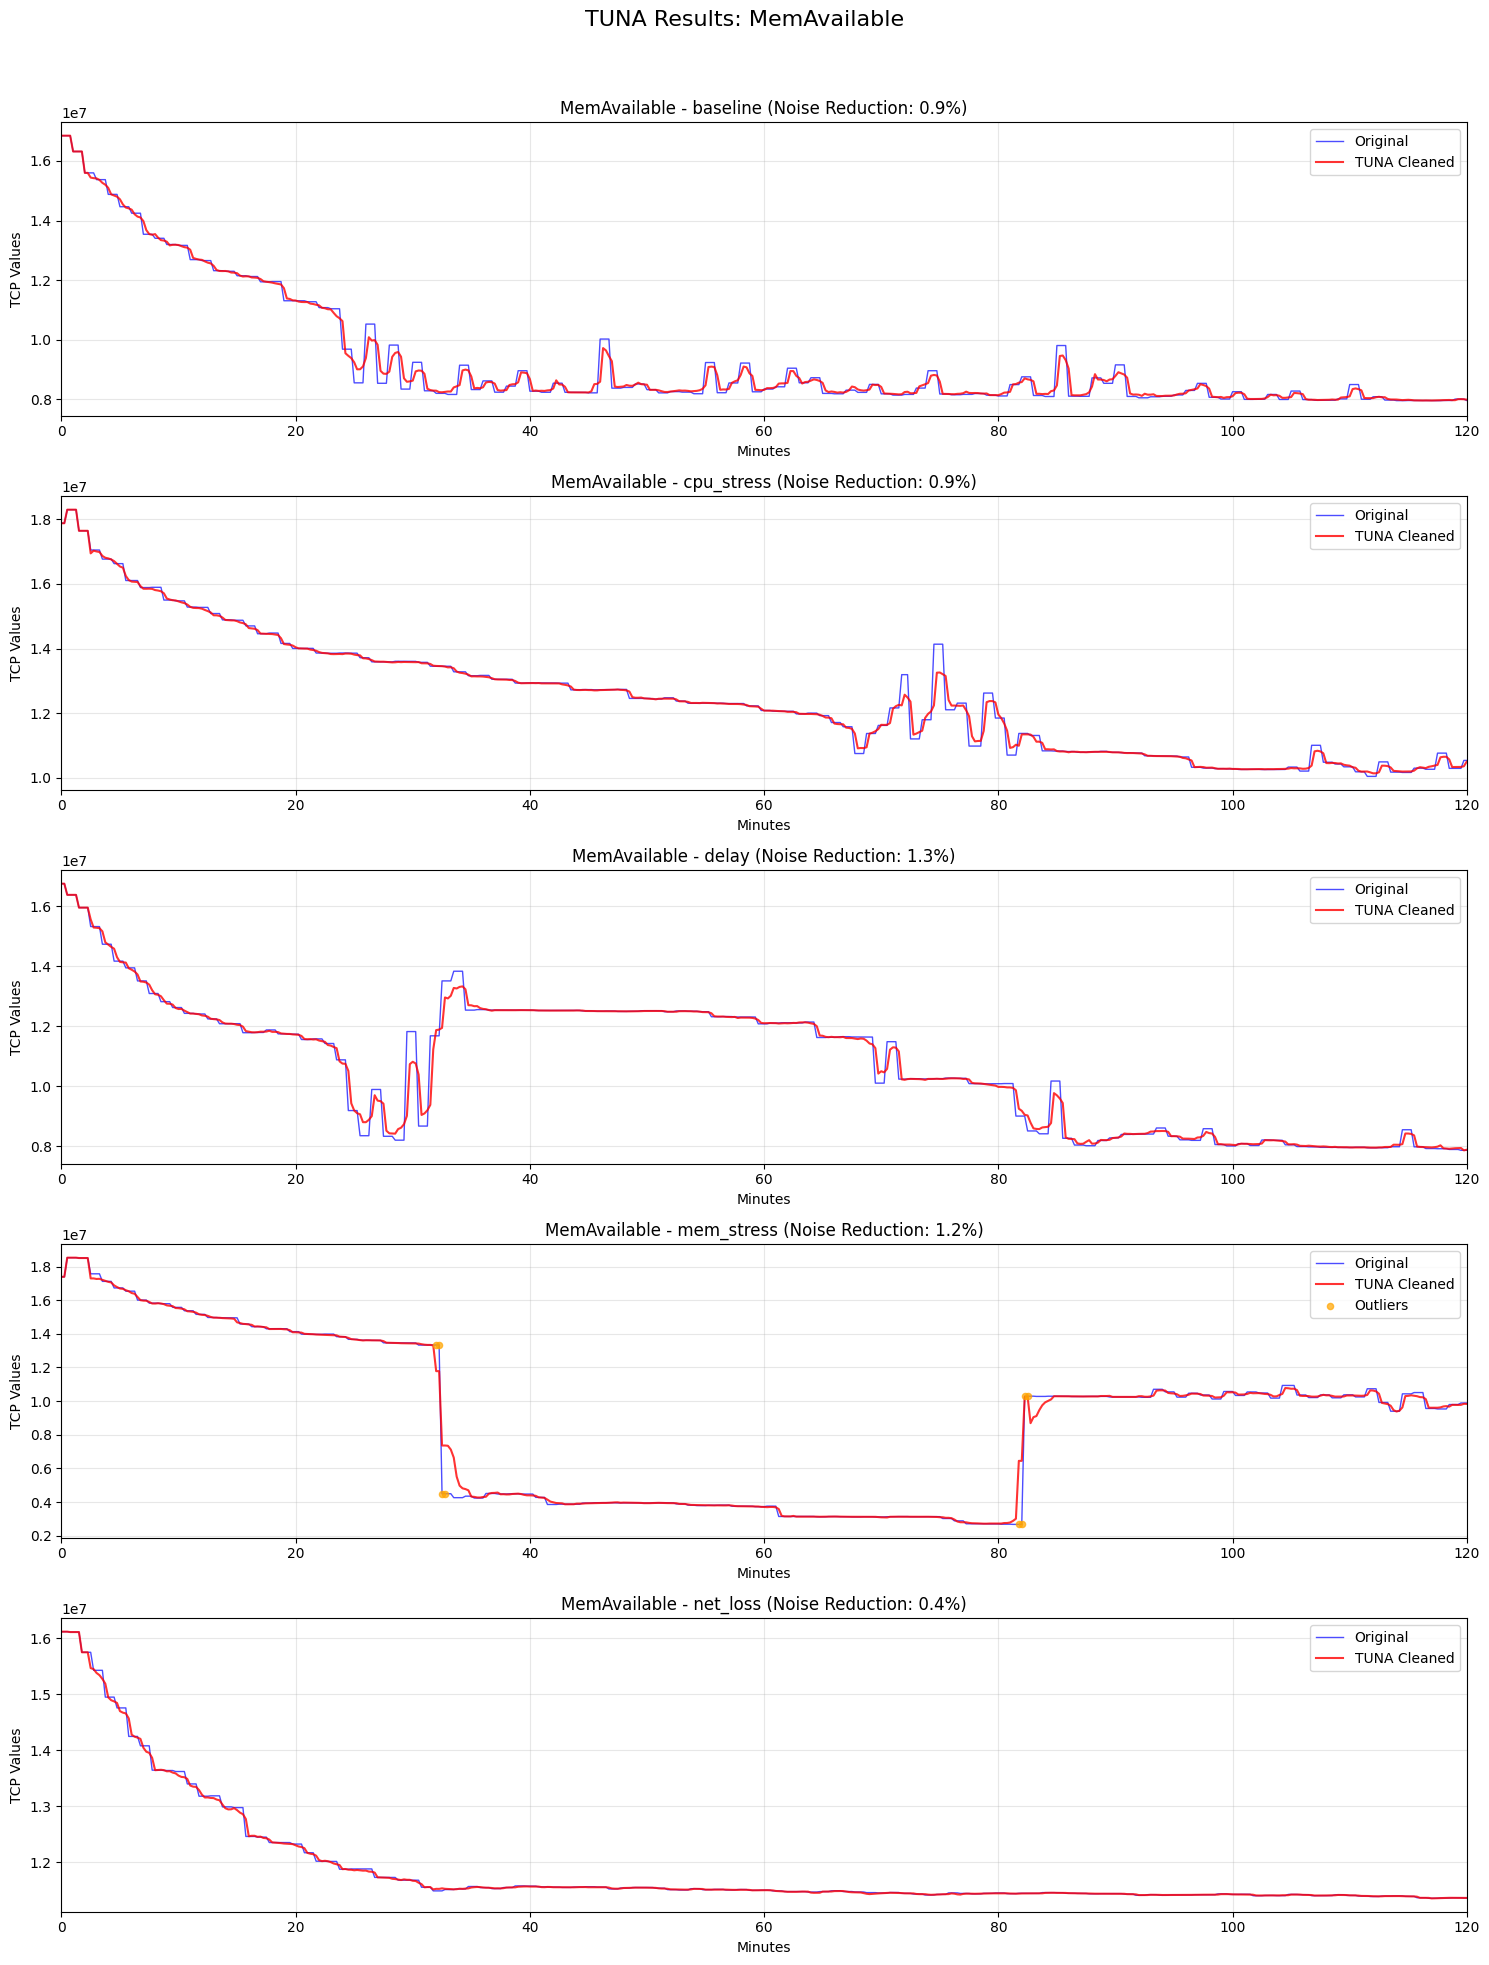

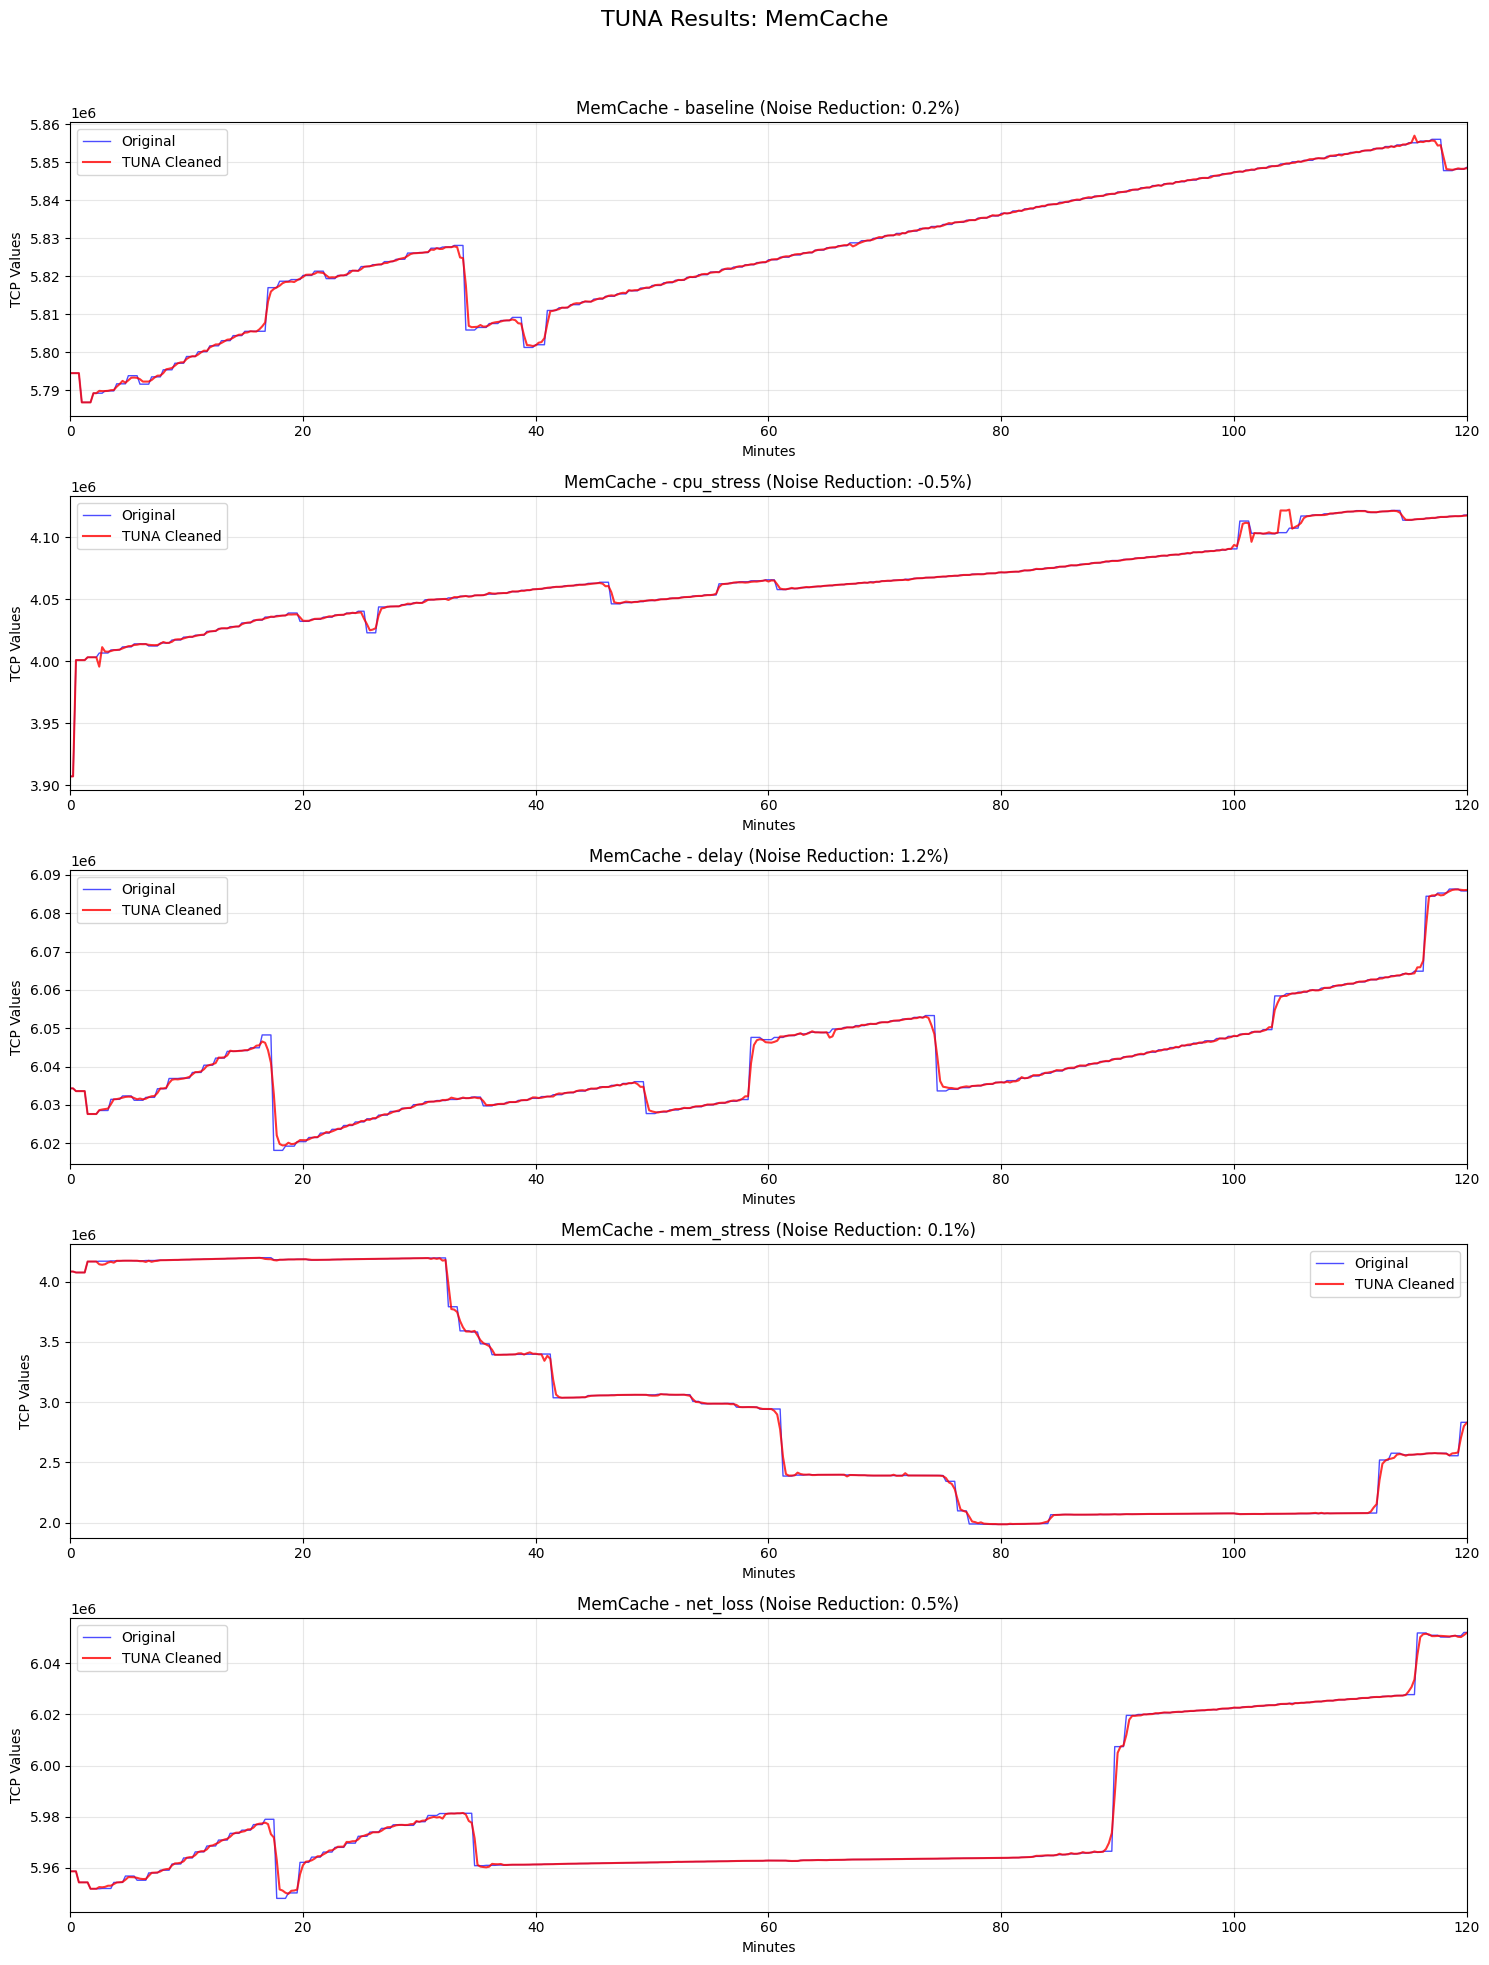

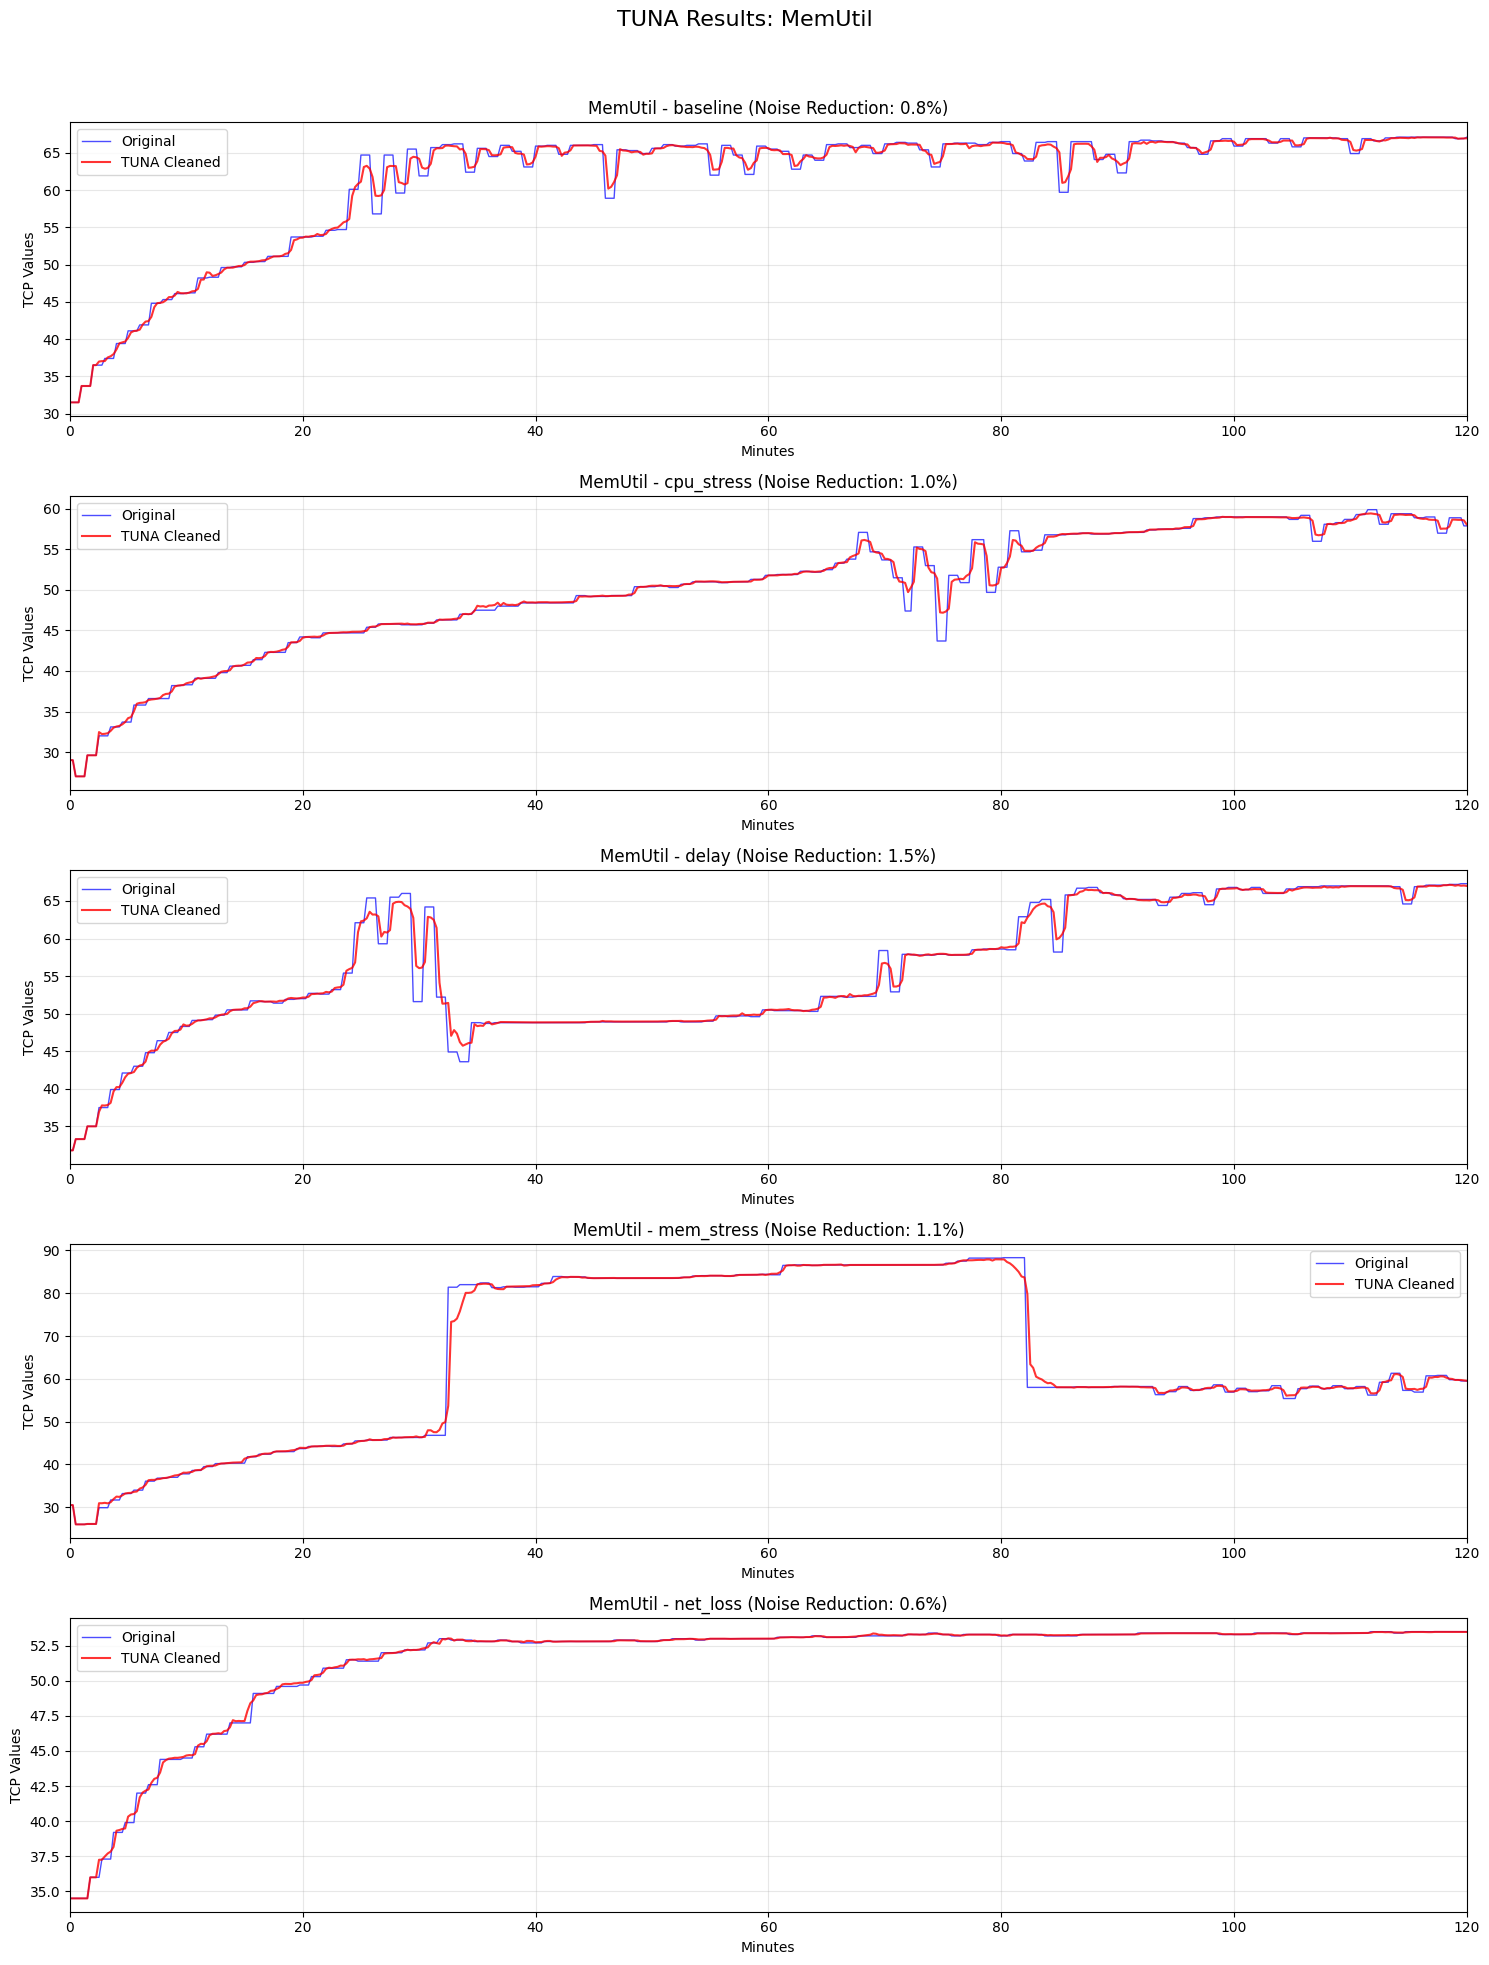


Memory TUNA Results Summary:
Metric          Experiment   Outliers   Noise Red%   Correlation 
------------------------------------------------------------
MemAvailable    baseline     0                 0.9%       0.994
MemAvailable    cpu_stress   0                 0.9%       0.995
MemAvailable    delay        0                 1.3%       0.990
MemAvailable    mem_stress   8                 1.2%       0.996
MemAvailable    net_loss     0                 0.4%       0.999
MemCache        baseline     0                 0.2%       0.999
MemCache        cpu_stress   0                -0.5%       0.998
MemCache        delay        0                 1.2%       0.997
MemCache        mem_stress   0                 0.1%       1.000
MemCache        net_loss     0                 0.5%       0.999
MemUtil         baseline     0                 0.8%       0.994
MemUtil         cpu_stress   0                 1.0%       0.995
MemUtil         delay        0                 1.5%       0.989
MemUtil    

In [7]:
def extract_memory_values(df):
    """Extract memory values from single-column memory datasets"""
    # For memory datasets, we have a single value column (not cumulative like CPU)
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        return df[value_cols[0]].values
    else:
        # If multiple columns, sum them (shouldn't happen with memory data)
        return df[value_cols].sum(axis=1).values

def detect_outliers_tuna(timeseries, window_size=3, threshold=0.65, min_absolute_range=None):
    """
    TUNA's relative range outlier detection with stability improvements
    Formula: (max - min) / mean > threshold
    Mark only the max/min values in unstable windows as outliers
    """
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    # Calculate adaptive minimum absolute range if not provided
    if min_absolute_range is None:
        # Use 5% of the overall time series standard deviation as minimum range
        min_absolute_range = 0.1 * np.std(timeseries)
    
    # Slide window across time series to detect unstable periods
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            # Apply TUNA relative range criterion
            relative_range = window_range / window_mean
            
            # Additional filter: require minimum absolute range to avoid hypersensitivity
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                # Mark extreme values within unstable window
                for j in range(window_size):
                    actual_idx = i + j
                    if (timeseries[actual_idx] == window_max or 
                        timeseries[actual_idx] == window_min):
                        outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    """Create features for RandomForest training"""
    features = []
    
    # Extract temporal and statistical features from sliding windows
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        # Statistical features from recent history
        feature_vector = [
            np.mean(window),                    # Rolling average
            np.std(window),                     # Variability measure
            np.median(window),                  # Robust central tendency
            np.max(window) - np.min(window),    # Range indicator
            timeseries[i-1],                    # Previous value dependency
            i / len(timeseries),                # Temporal position
        ]
        
        # Experiment context encoding for cross-experiment learning
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_metric(metric_name, all_experiments):
    """Train RandomForest on stable periods across all experiments"""
    print(f"Training {metric_name}...")
    
    X_stable_all = []
    y_stable_all = []
    
    # Aggregate stable training data from all experimental conditions
    for exp_name, df in all_experiments.items():
        memory_values = extract_memory_values(df)
        outlier_mask = detect_outliers_tuna(memory_values)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(memory_values, exp_name)
        # Align feature window with stability detection
        stable_features_mask = stable_mask[10:]
        stable_features = features[stable_features_mask]
        stable_targets = memory_values[10:][stable_features_mask]
        
        if len(stable_features) > 0:
            # Apply local smoothing to targets for better generalization
            smoothed_targets = []
            for j, target in enumerate(stable_targets):
                start_idx = max(0, j-2)
                end_idx = min(len(stable_targets), j+3)
                local_values = stable_targets[start_idx:end_idx]
                smoothed_targets.append(np.median(local_values))
            
            X_stable_all.extend(stable_features)
            y_stable_all.extend(smoothed_targets)
    
    # Ensure sufficient training data
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Standardize features for optimal model performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_stable_all)

    # Hyperparameter grid for model optimization
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestRegressor(
        criterion='squared_error',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # Grid search with cross-validation for robust parameter selection
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_scaled, y_stable_all)
    model = grid_search.best_estimator_
    
    return model, scaler

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.5):
    """Apply penalty to outliers by reducing their deviation from baseline"""
    cleaned_series = timeseries.copy()
    
    # Establish baseline from stable measurements
    stable_values = timeseries[~outlier_mask]
    if len(stable_values) > 0:
        baseline = np.median(stable_values)
    else:
        baseline = np.median(timeseries)
    
    # Reduce outlier magnitude toward baseline
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            original_value = timeseries[i]
            # Linear penalty: reduce distance from baseline by factor
            cleaned_series[i] = baseline + (original_value - baseline) * penalty_factor
    
    return cleaned_series

def apply_tuna_to_single_series(memory_values, exp_name, model, scaler, penalty_factor=0.5, blend_weight=1.0):
    """Apply TUNA cleaning to a single memory time series"""
    
    # Phase 1: Identify unstable measurements
    outlier_mask = detect_outliers_tuna(memory_values)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    # Phase 2: Apply penalty to outliers (reduce toward baseline if available)
    cleaned_series = apply_penalty(memory_values, outlier_mask, penalty_factor)
    
    # Phase 3: Apply ML enhancement only for stable periods (100% ML)
    if model is not None and scaler is not None:
        try:
            # Create features for ML prediction
            features = create_features_for_ml(memory_values, exp_name)
            features_scaled = scaler.transform(features)
            ml_predictions = model.predict(features_scaled)
            
            # Apply 100% ML for stable periods only
            for i, prediction in enumerate(ml_predictions):
                actual_idx = i + 10  # Account for feature window offset
                if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                    cleaned_series[actual_idx] = prediction
            
        except Exception as e:
            print(f"  ⚠ ML enhancement failed for {exp_name}: {str(e)}")
    
    # Calculate cleaning statistics
    original_std = np.std(memory_values)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100 if original_std > 0 else 0
    correlation = np.corrcoef(memory_values, cleaned_series)[0, 1] if len(memory_values) > 1 else 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'outlier_percentage': (outliers_count / len(memory_values)) * 100,
        'noise_reduction': noise_reduction,
        'correlation': correlation
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_for_all_metrics():
    """Run TUNA for all memory metrics"""
    print("Running TUNA analysis on memory datasets...")
    
    tuna_results = {}
    
    # Process each memory metric independently
    for metric_name, experiments in all_datasets.items():
        print(f"Processing {metric_name}")
        
        # Train metric-specific model on cross-experiment stable data
        model, scaler = train_random_forest_for_metric(metric_name, experiments)
        
        # Apply cleaning to each experimental condition
        metric_results = {}
        for exp_name, df in experiments.items():
            memory_values = extract_memory_values(df)
            cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                memory_values, exp_name, model, scaler
            )
            
            metric_results[exp_name] = {
                'original': memory_values,
                'cleaned': cleaned_series,
                'outliers': outlier_mask,
                'stats': stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results):
    """Plot TUNA results with original vs cleaned comparison using Minutes (0-120) x-axis"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        # Visualize cleaning results for each experiment
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            # Get the corresponding dataframe to extract Minutes column
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            # Plot time series with cleaning overlay using Minutes as x-axis
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            # Highlight detected outliers
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            # Set appropriate y-axis label based on metric
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT Values'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            else:
                y_label = 'TCP Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120) 
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary(tuna_results):
    """Print summary table of cleaning effectiveness"""
    print("\nMemory TUNA Results Summary:")
    print("="*60)
    print(f"{'Metric':<15} {'Experiment':<12} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*60)
    
    # Tabulate results across all metrics and experiments
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<15} {exp_name:<12} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

# Execute complete TUNA analysis pipeline
tuna_results = run_tuna_for_all_metrics()
plot_tuna_results(tuna_results)
print_tuna_summary(tuna_results)


COMPREHENSIVE MEMORY ANALYSIS
Each memory metric will be compared to its own baseline

🔍 Analyzing MemAvailable...

📊 Comparing MemAvailable: cpu_stress stress vs baseline


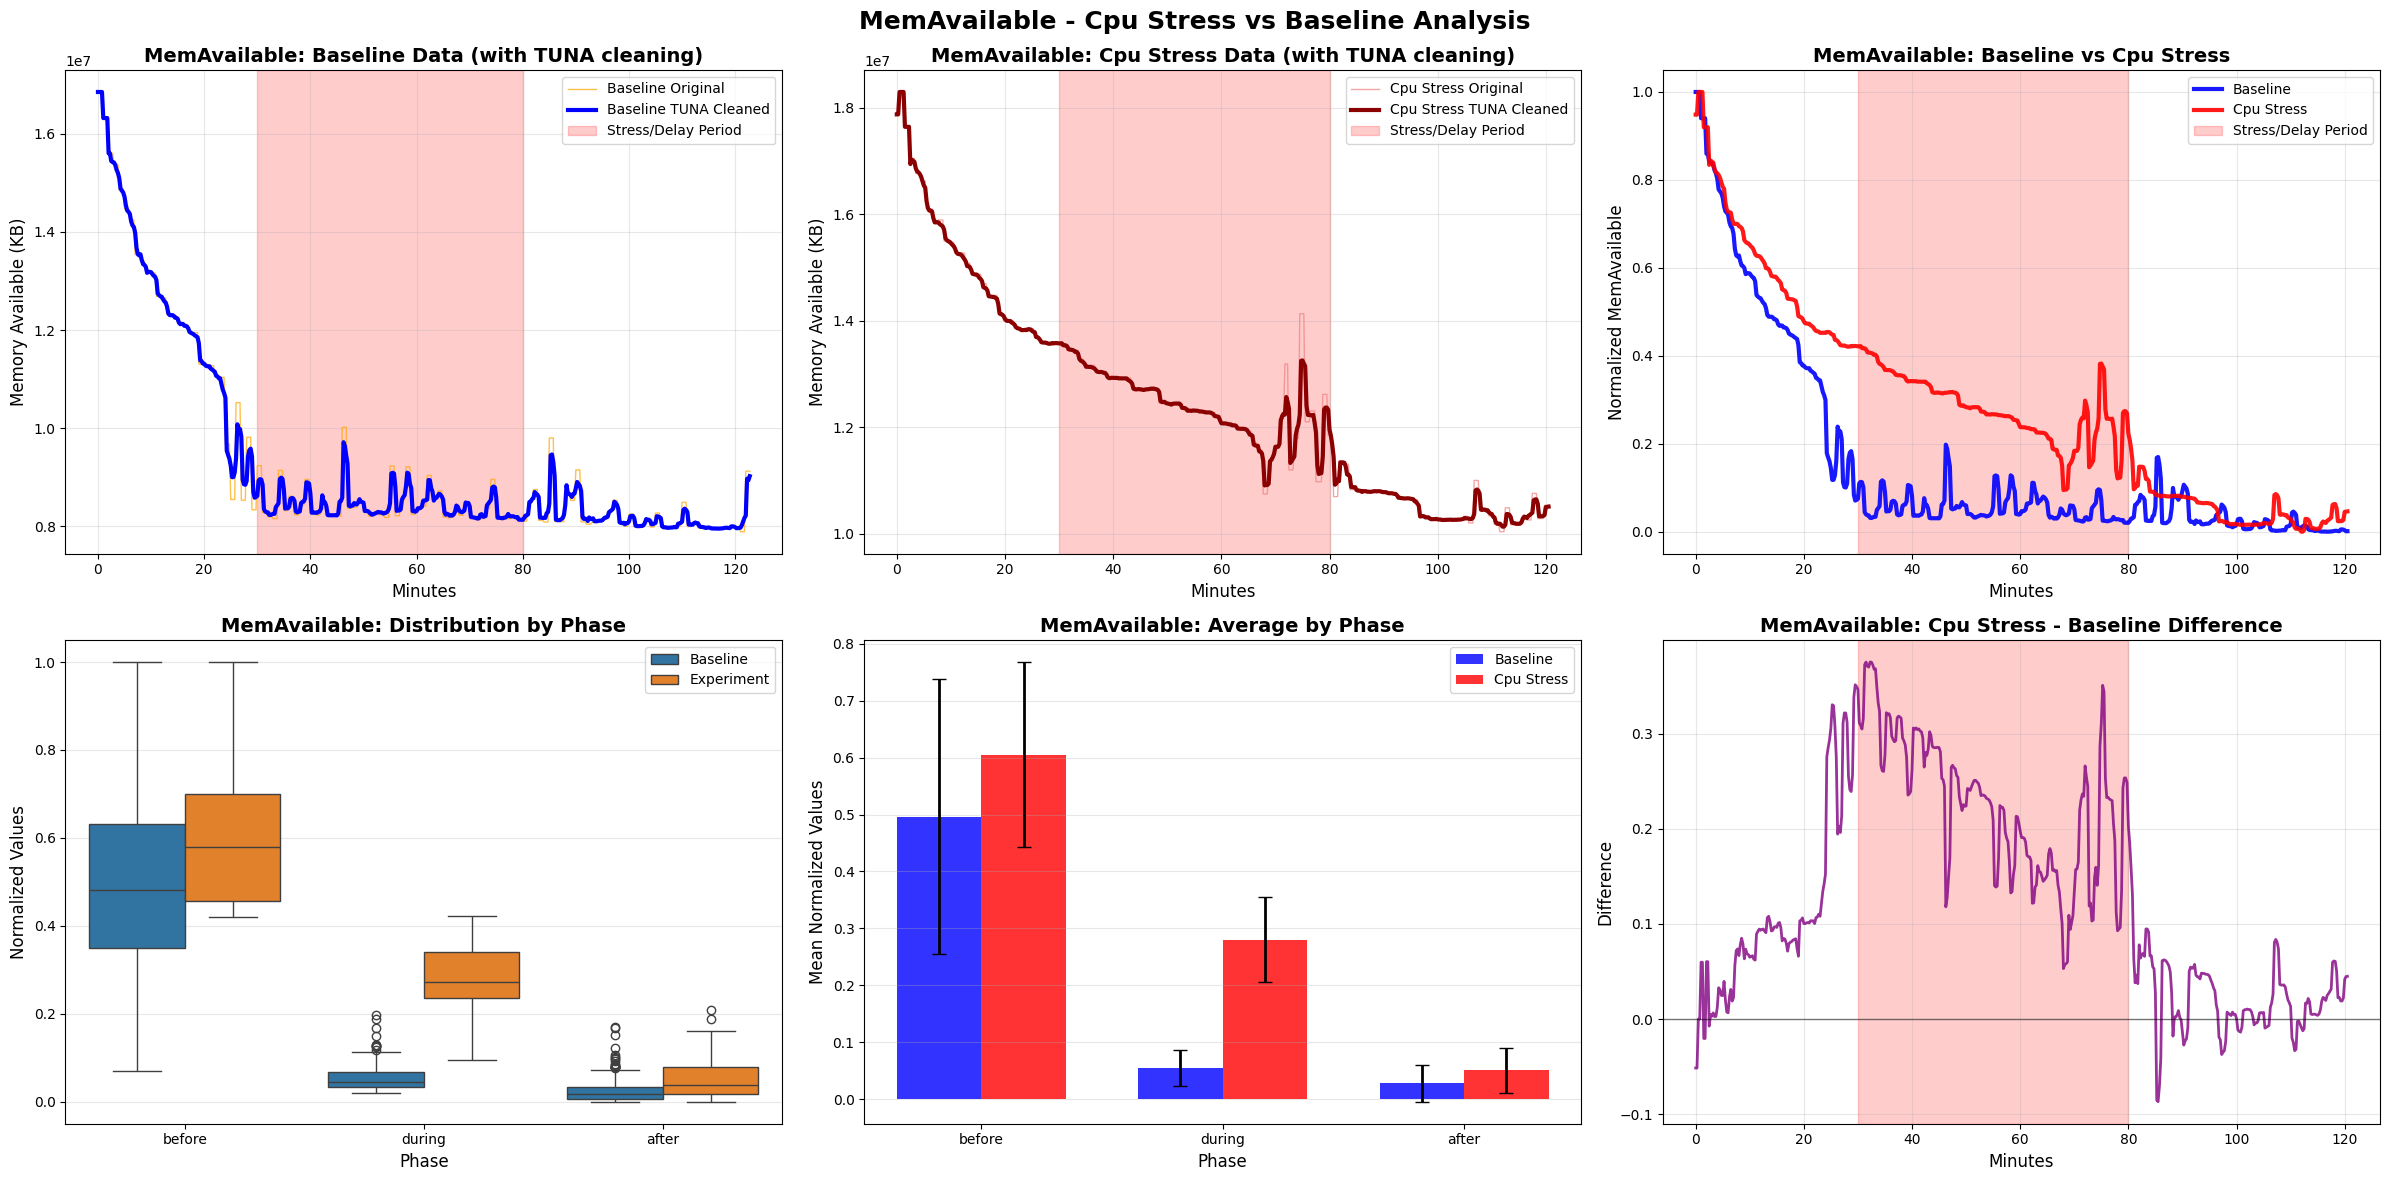


MEMAVAILABLE - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.995
  BASELINE: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0281  0.0325  0.0000  0.1699
before  0.4962  0.2419  0.0708  1.0000
during  0.0554  0.0315  0.0202  0.1979

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0509  0.0399  0.0000  0.2093
before  0.6054  0.1624  0.4208  1.0000
during  0.2805  0.0754  0.0949  0.4221

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -4.10, p=  0.0001 (SIGNIFICANT)
  DURING  : t=-39.07, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -5.64, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  +22.00% (INCREASE)
  DURING  : +406.69% (INCREASE)
  AFTER   :  +81.11% (INCREASE)

MEMORY METRICS DETAILS:
  M

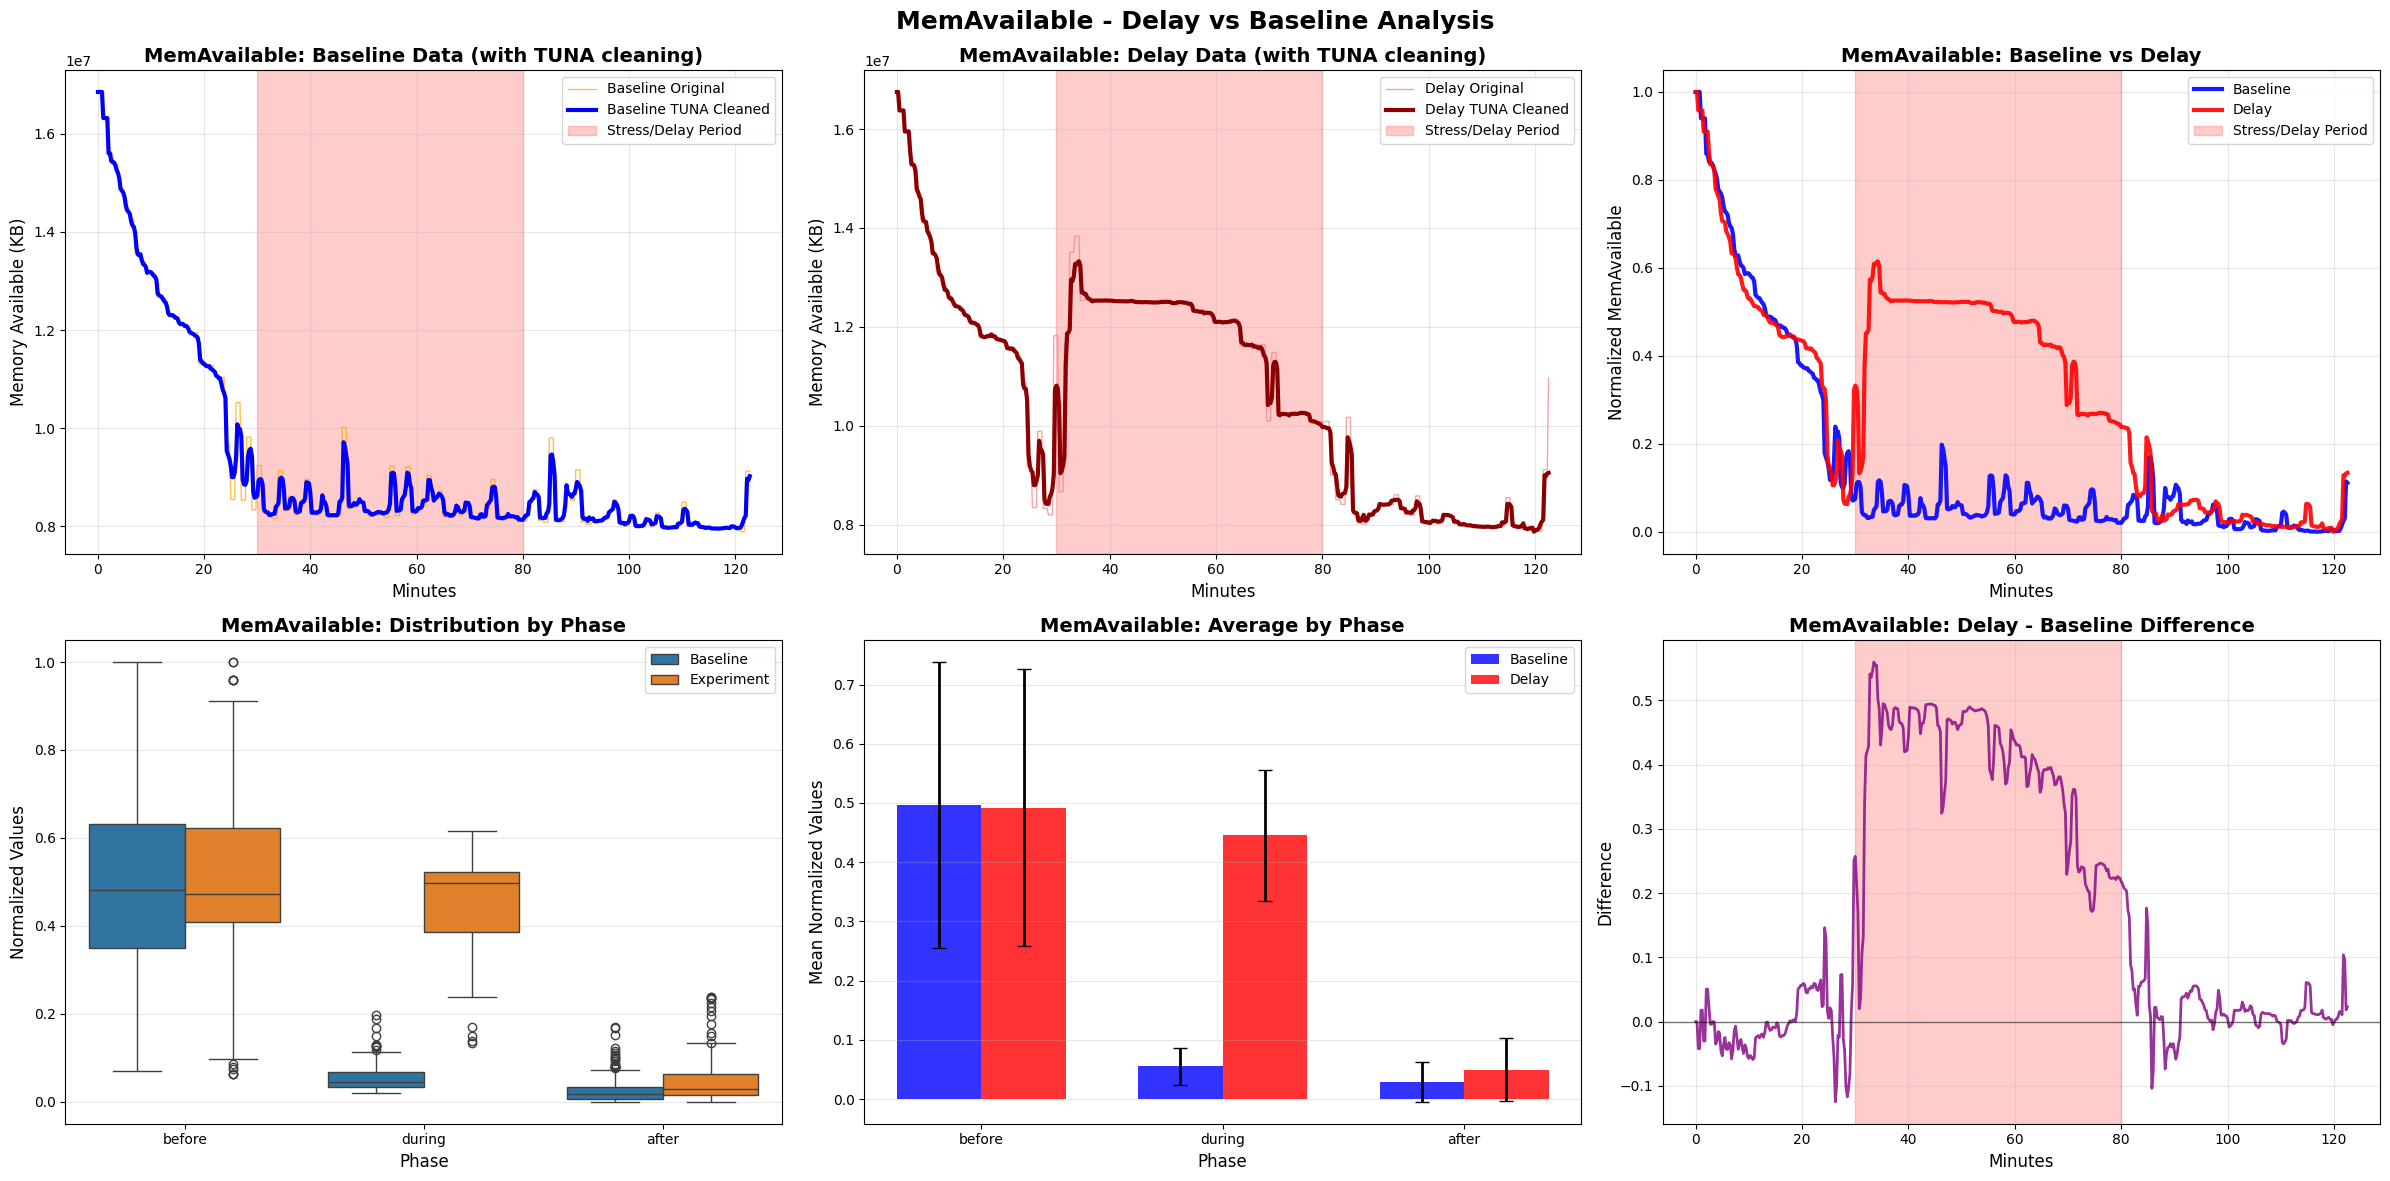


MEMAVAILABLE - DELAY VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  DELAY: 0 outliers removed
    Noise Reduction: 1.3%, Correlation: 0.990
  BASELINE: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0286  0.0332  0.0000  0.1699
before  0.4962  0.2419  0.0708  1.0000
during  0.0554  0.0315  0.0202  0.1979

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0495  0.0532  0.0000  0.2381
before  0.4920  0.2337  0.0628  1.0000
during  0.4456  0.1108  0.1329  0.6149

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  0.14, p=  0.8913 (NOT SIGNIFICANT)
  DURING  : t=-48.01, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -4.34, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :   -0.85% (DECREASE)
  DURING  : +704.95% (INCREASE)
  AFTER   :  +73.08% (INCREASE)

MEMORY METRICS DETAILS:
  Metric: MemAvaila

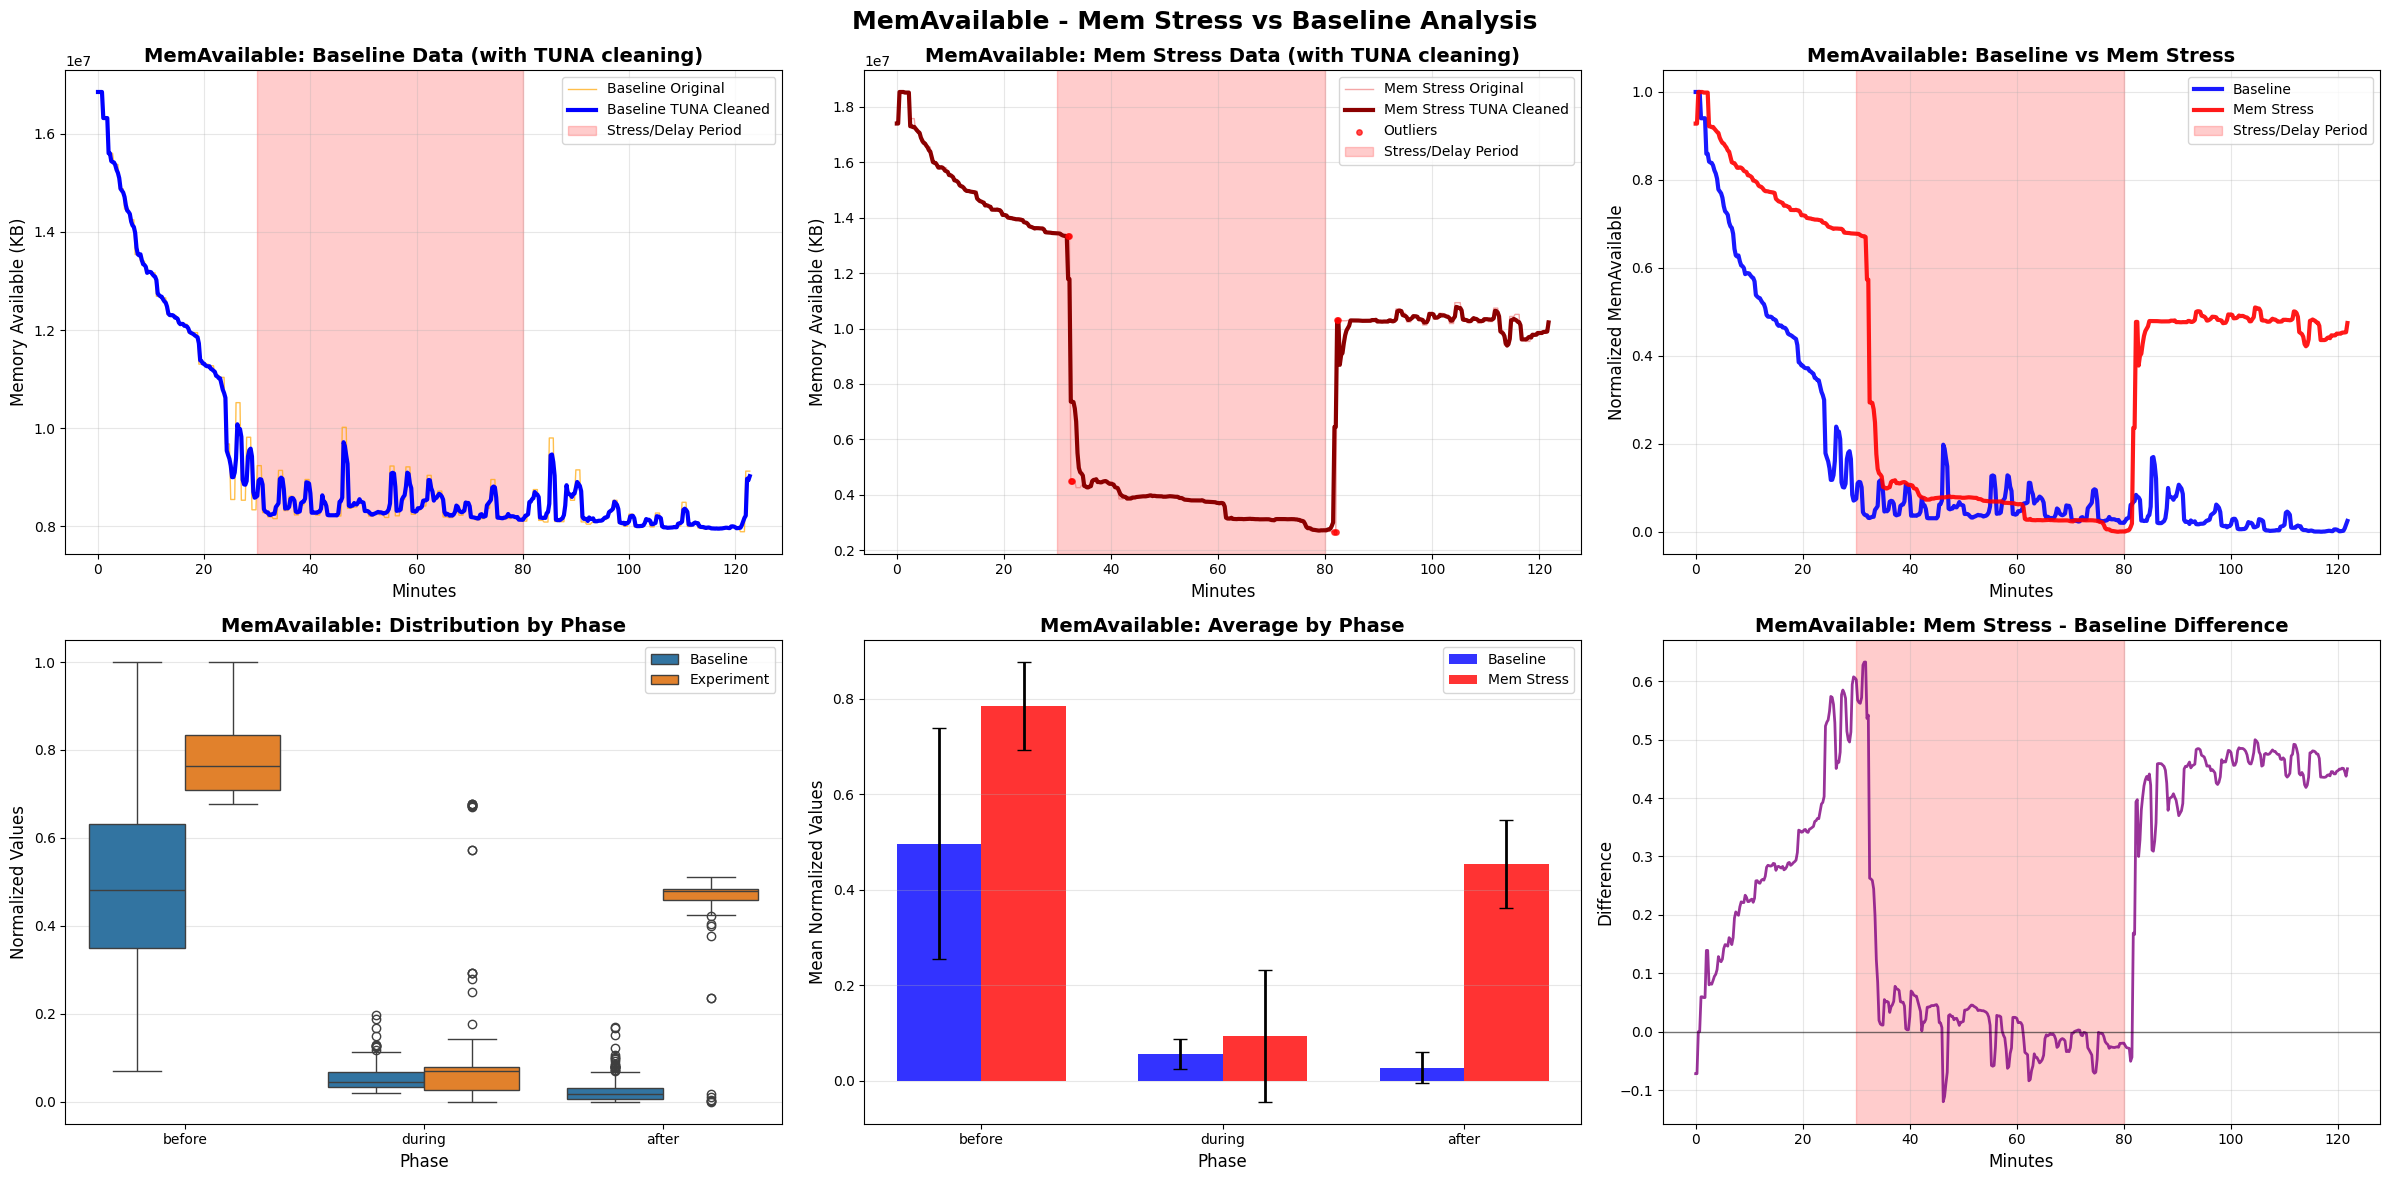


MEMAVAILABLE - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 8 outliers removed
    Noise Reduction: 1.2%, Correlation: 0.996
  BASELINE: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0276  0.0322  0.0000  0.1699
before  0.4962  0.2419  0.0708  1.0000
during  0.0554  0.0315  0.0202  0.1979

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4541  0.0928  0.0005  0.5100
before  0.7849  0.0922  0.6780  1.0000
during  0.0938  0.1377  0.0000  0.6777

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-12.21, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -3.86, p=  0.0001 (SIGNIFICANT)
  AFTER   : t=-56.12, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  +58.18% (INCREASE)
  DURING  :  +69.49% (INCREASE)
  AFTER   : +1547.70% (INCREASE)

MEMORY METRICS DETAILS:
  

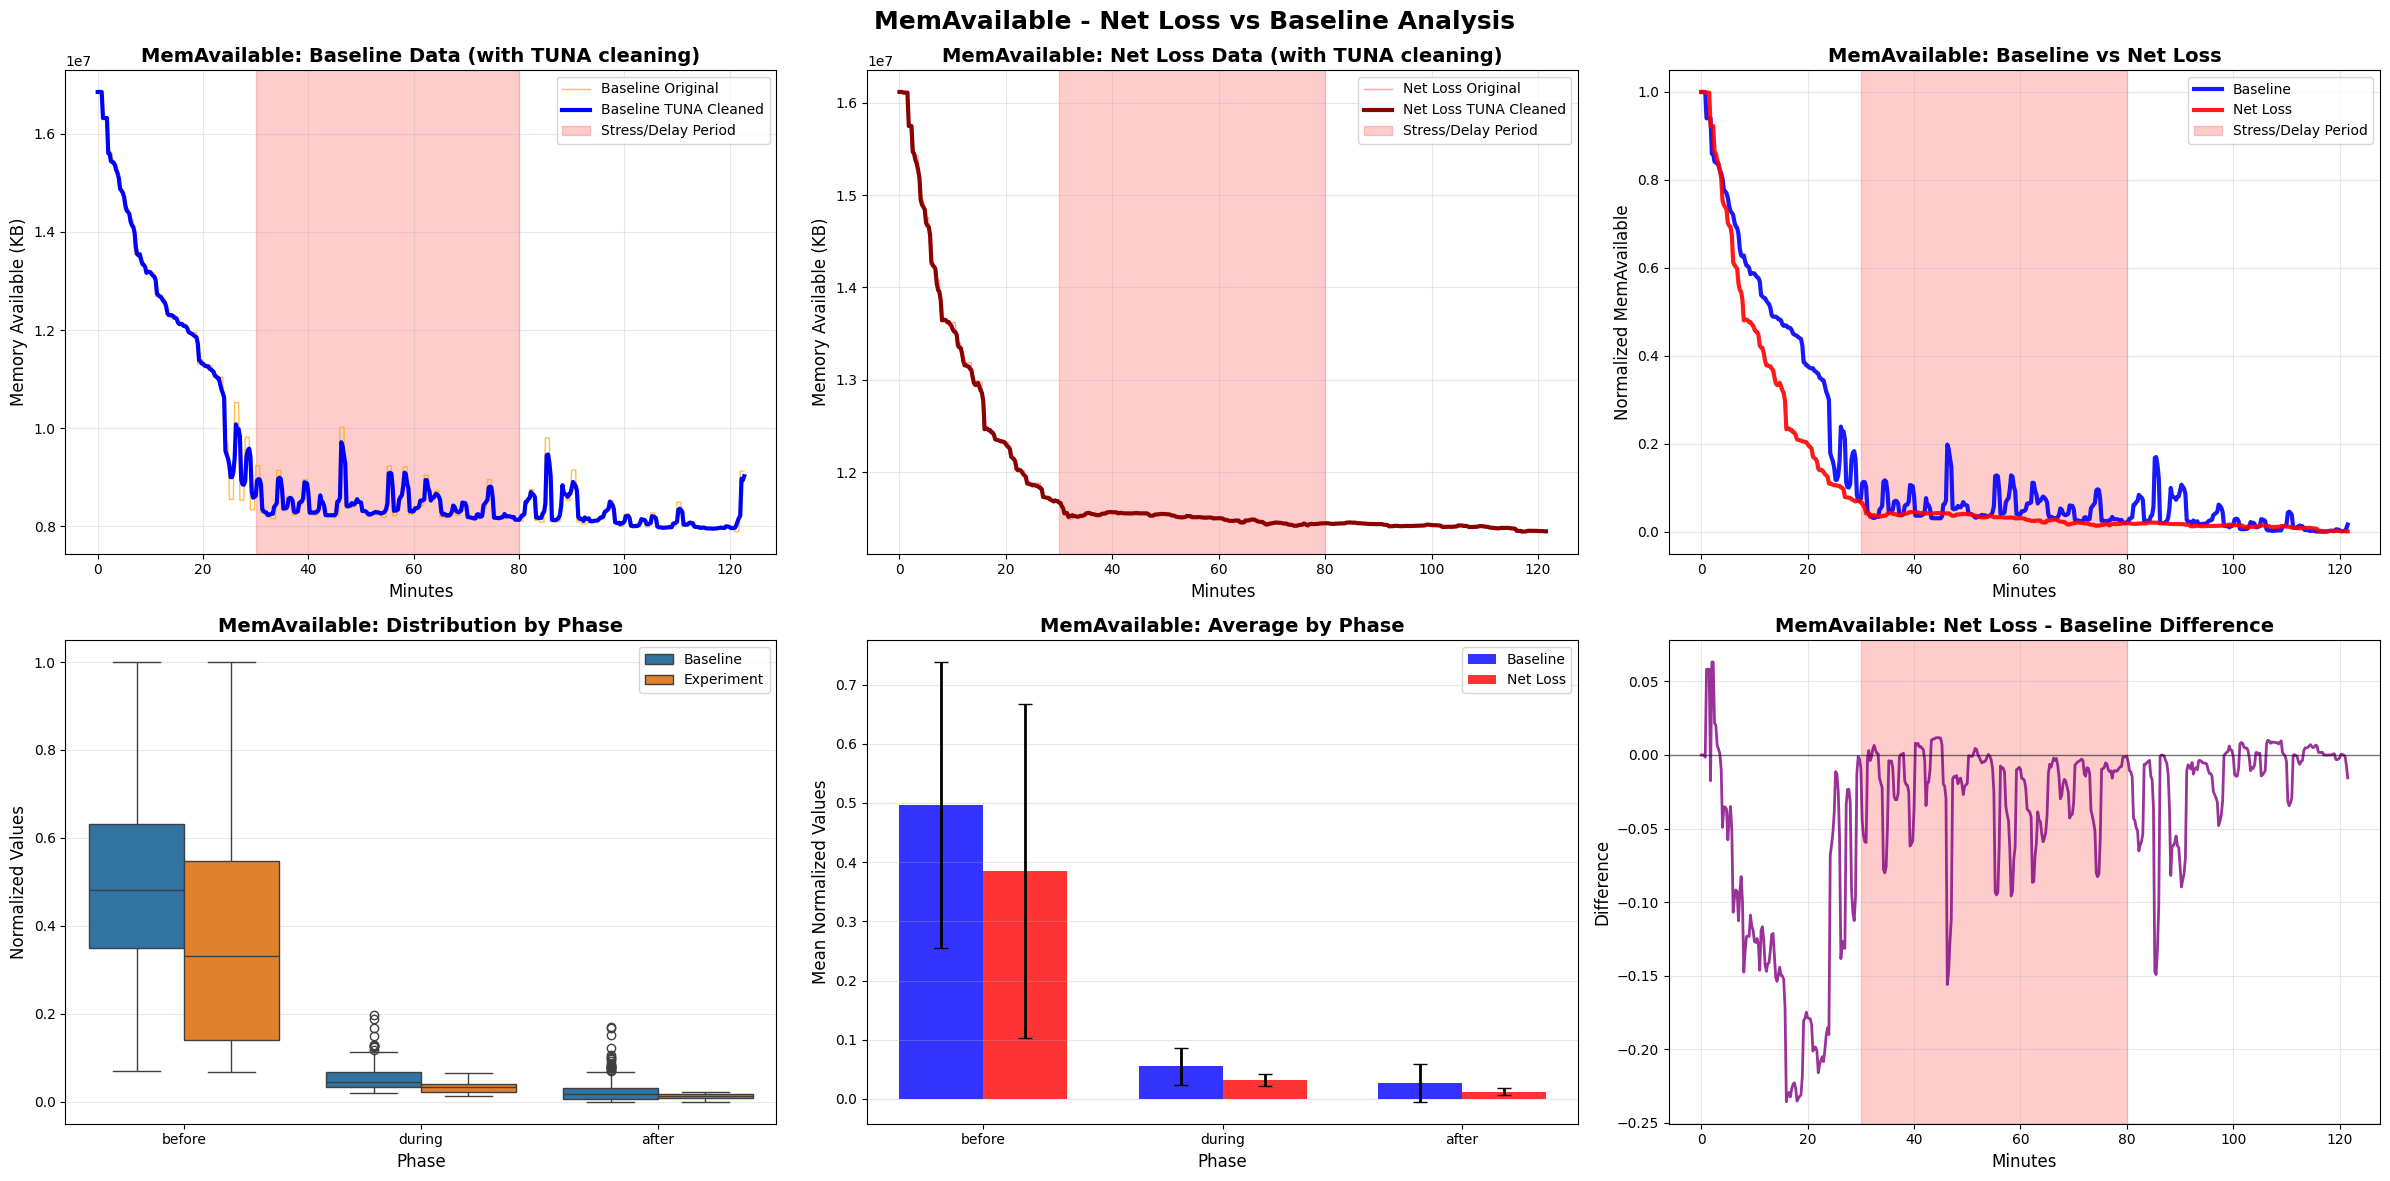


MEMAVAILABLE - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 0.4%, Correlation: 0.999
  BASELINE: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0276  0.0323  0.0000  0.1699
before  0.4962  0.2419  0.0708  1.0000
during  0.0554  0.0315  0.0202  0.1979

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0123  0.0056  0.0000  0.0211
before  0.3849  0.2817  0.0687  1.0000
during  0.0316  0.0103  0.0134  0.0661

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  3.28, p=  0.0012 (SIGNIFICANT)
  DURING  : t= 10.17, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  6.00, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  -22.42% (DECREASE)
  DURING  :  -42.93% (DECREASE)
  AFTER   :  -55.28% (DECREASE)

MEMORY METRICS DETAILS:
  Metric: M

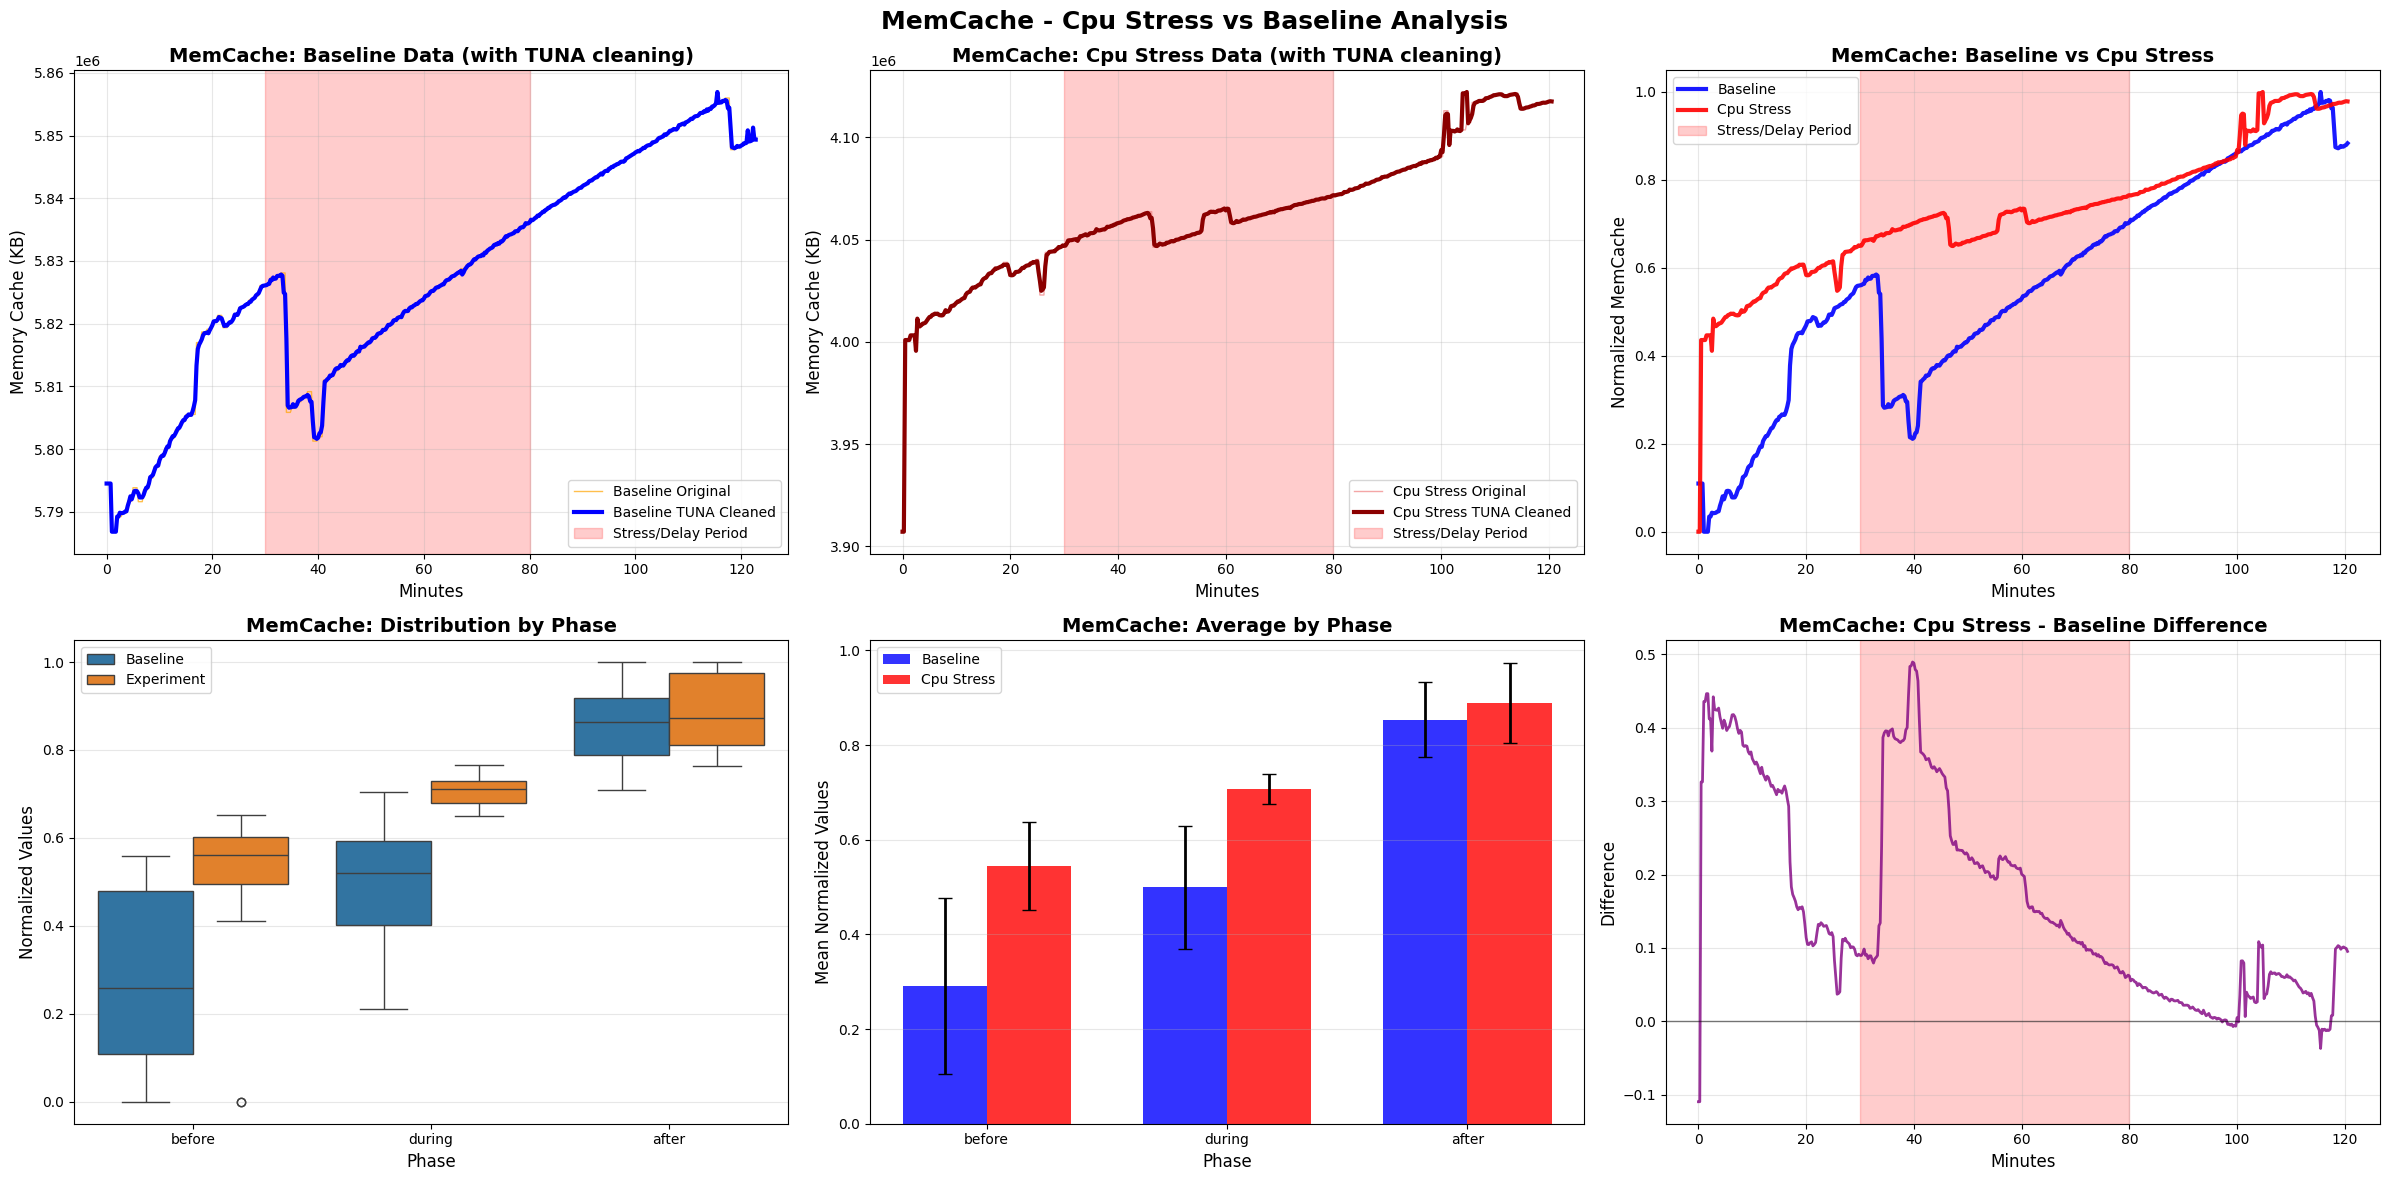


MEMCACHE - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: -0.5%, Correlation: 0.998
  BASELINE: 0 outliers removed
    Noise Reduction: 0.2%, Correlation: 0.999

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8539  0.0788  0.7082  1.0000
before  0.2917  0.1862  0.0000  0.5596
during  0.4994  0.1304  0.2113  0.7035

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8892  0.0843  0.7646  1.0000
before  0.5443  0.0931  0.0000  0.6512
during  0.7067  0.0316  0.6497  0.7654

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-13.29, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-21.90, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -3.90, p=  0.0001 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  +86.60% (INCREASE)
  DURING  :  +41.51% (INCREASE)
  AFTER   :   +4.14% (INCREASE)

MEMORY METRICS DETAILS:
  Metr

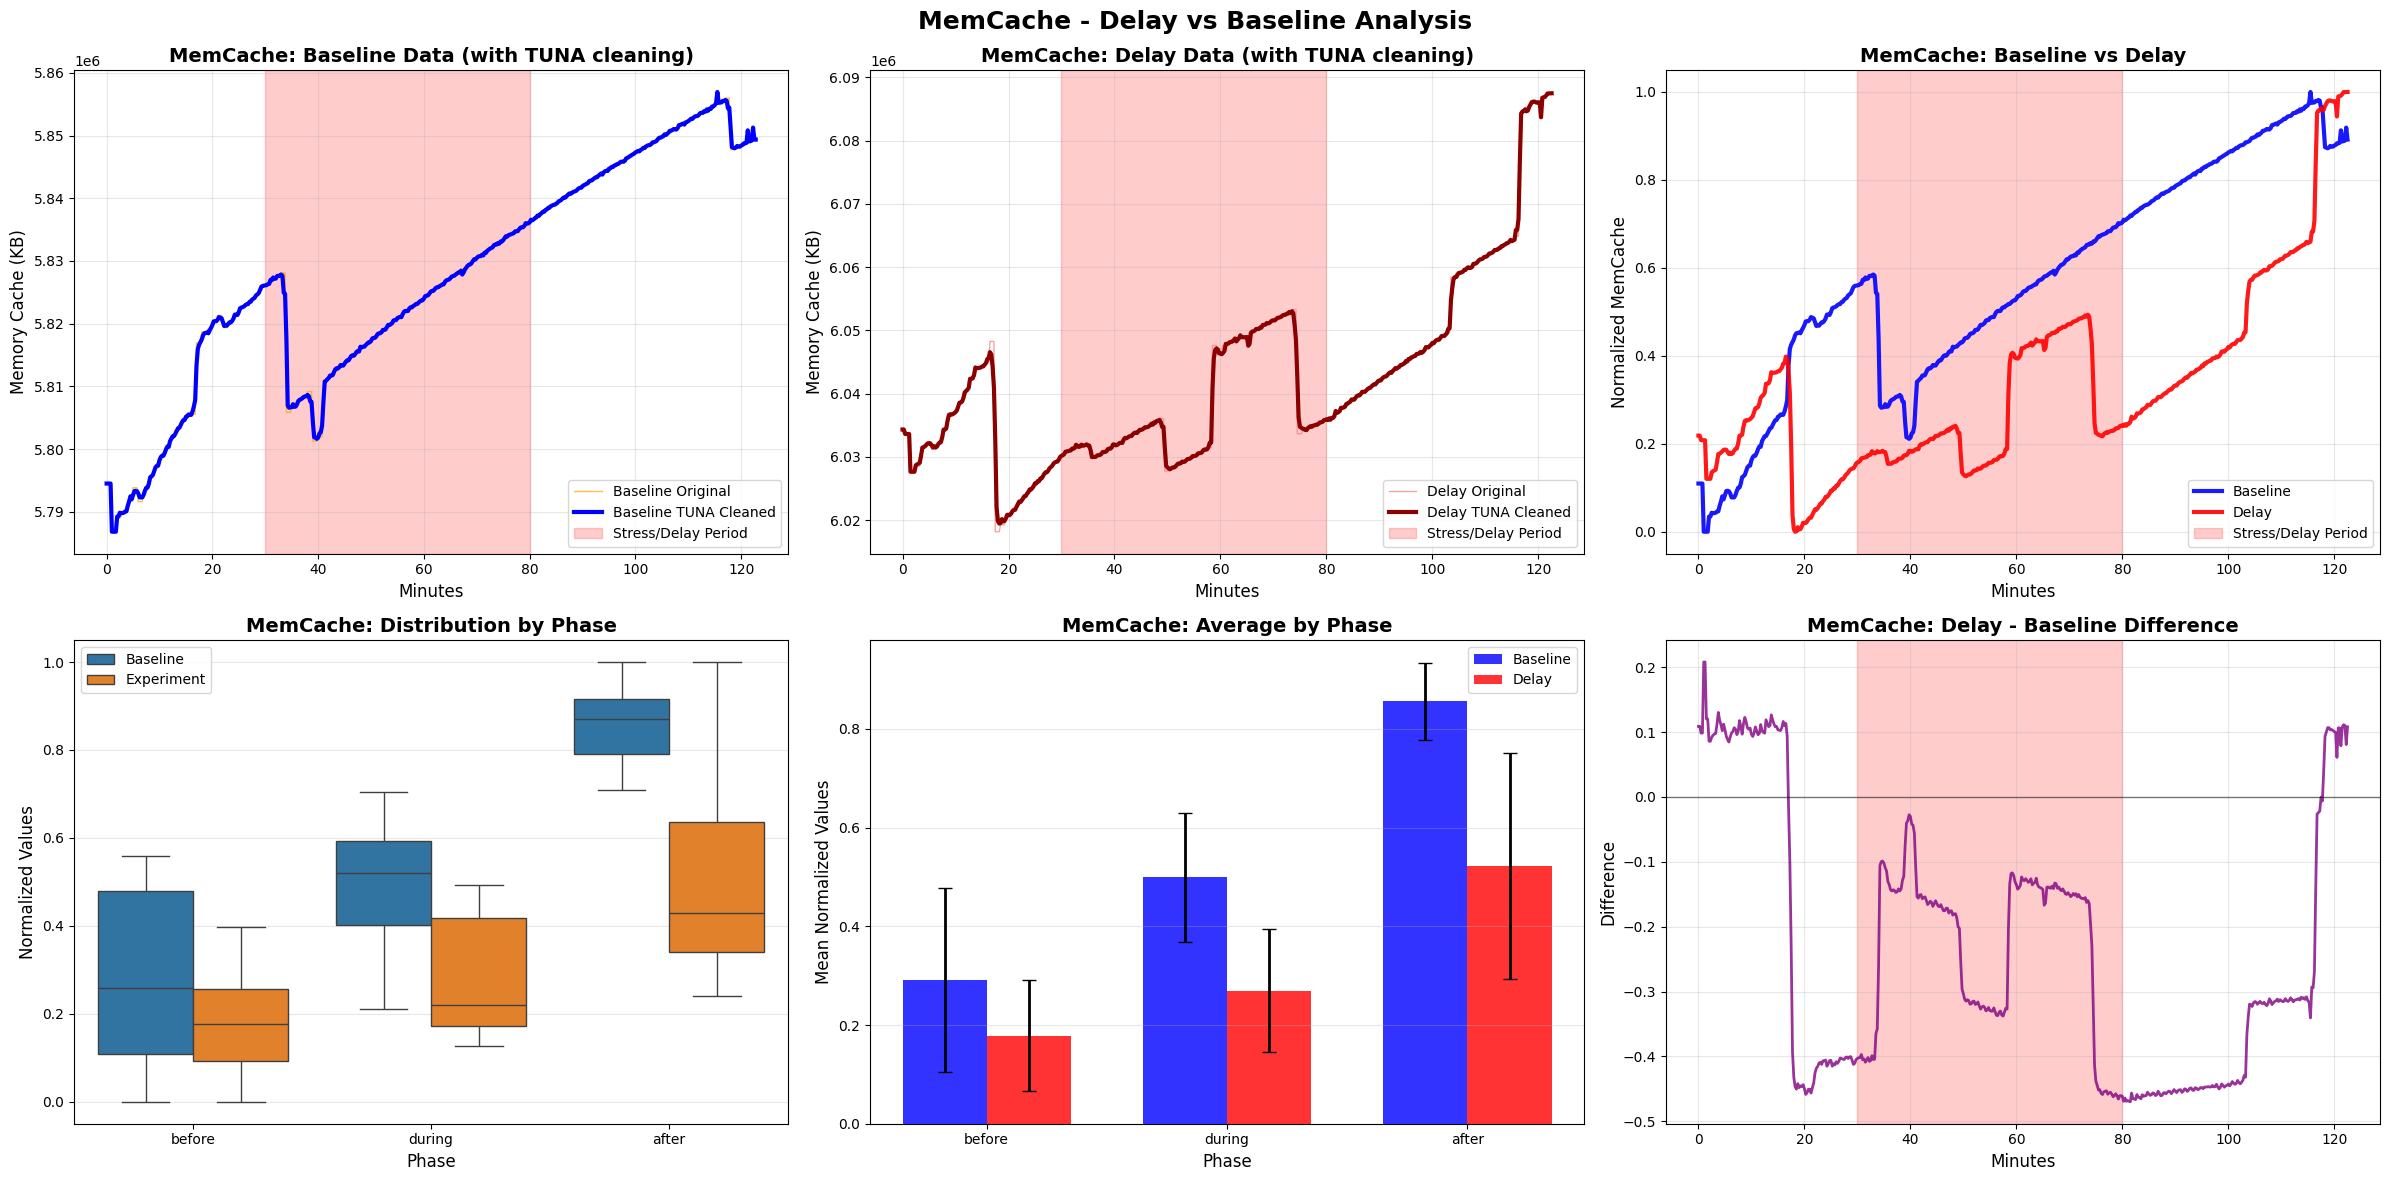


MEMCACHE - DELAY VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  DELAY: 0 outliers removed
    Noise Reduction: 1.2%, Correlation: 0.997
  BASELINE: 0 outliers removed
    Noise Reduction: 0.2%, Correlation: 0.999

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8558  0.0775  0.7082  1.0000
before  0.2917  0.1862  0.0000  0.5596
during  0.4994  0.1304  0.2113  0.7035

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5216  0.2287  0.2405  1.0000
before  0.1783  0.1123  0.0000  0.3983
during  0.2694  0.1243  0.1261  0.4935

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.71, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 18.10, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 18.05, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :  -38.88% (DECREASE)
  DURING  :  -46.06% (DECREASE)
  AFTER   :  -39.06% (DECREASE)

MEMORY METRICS DETAILS:
  Metric: MemCache
  Metric

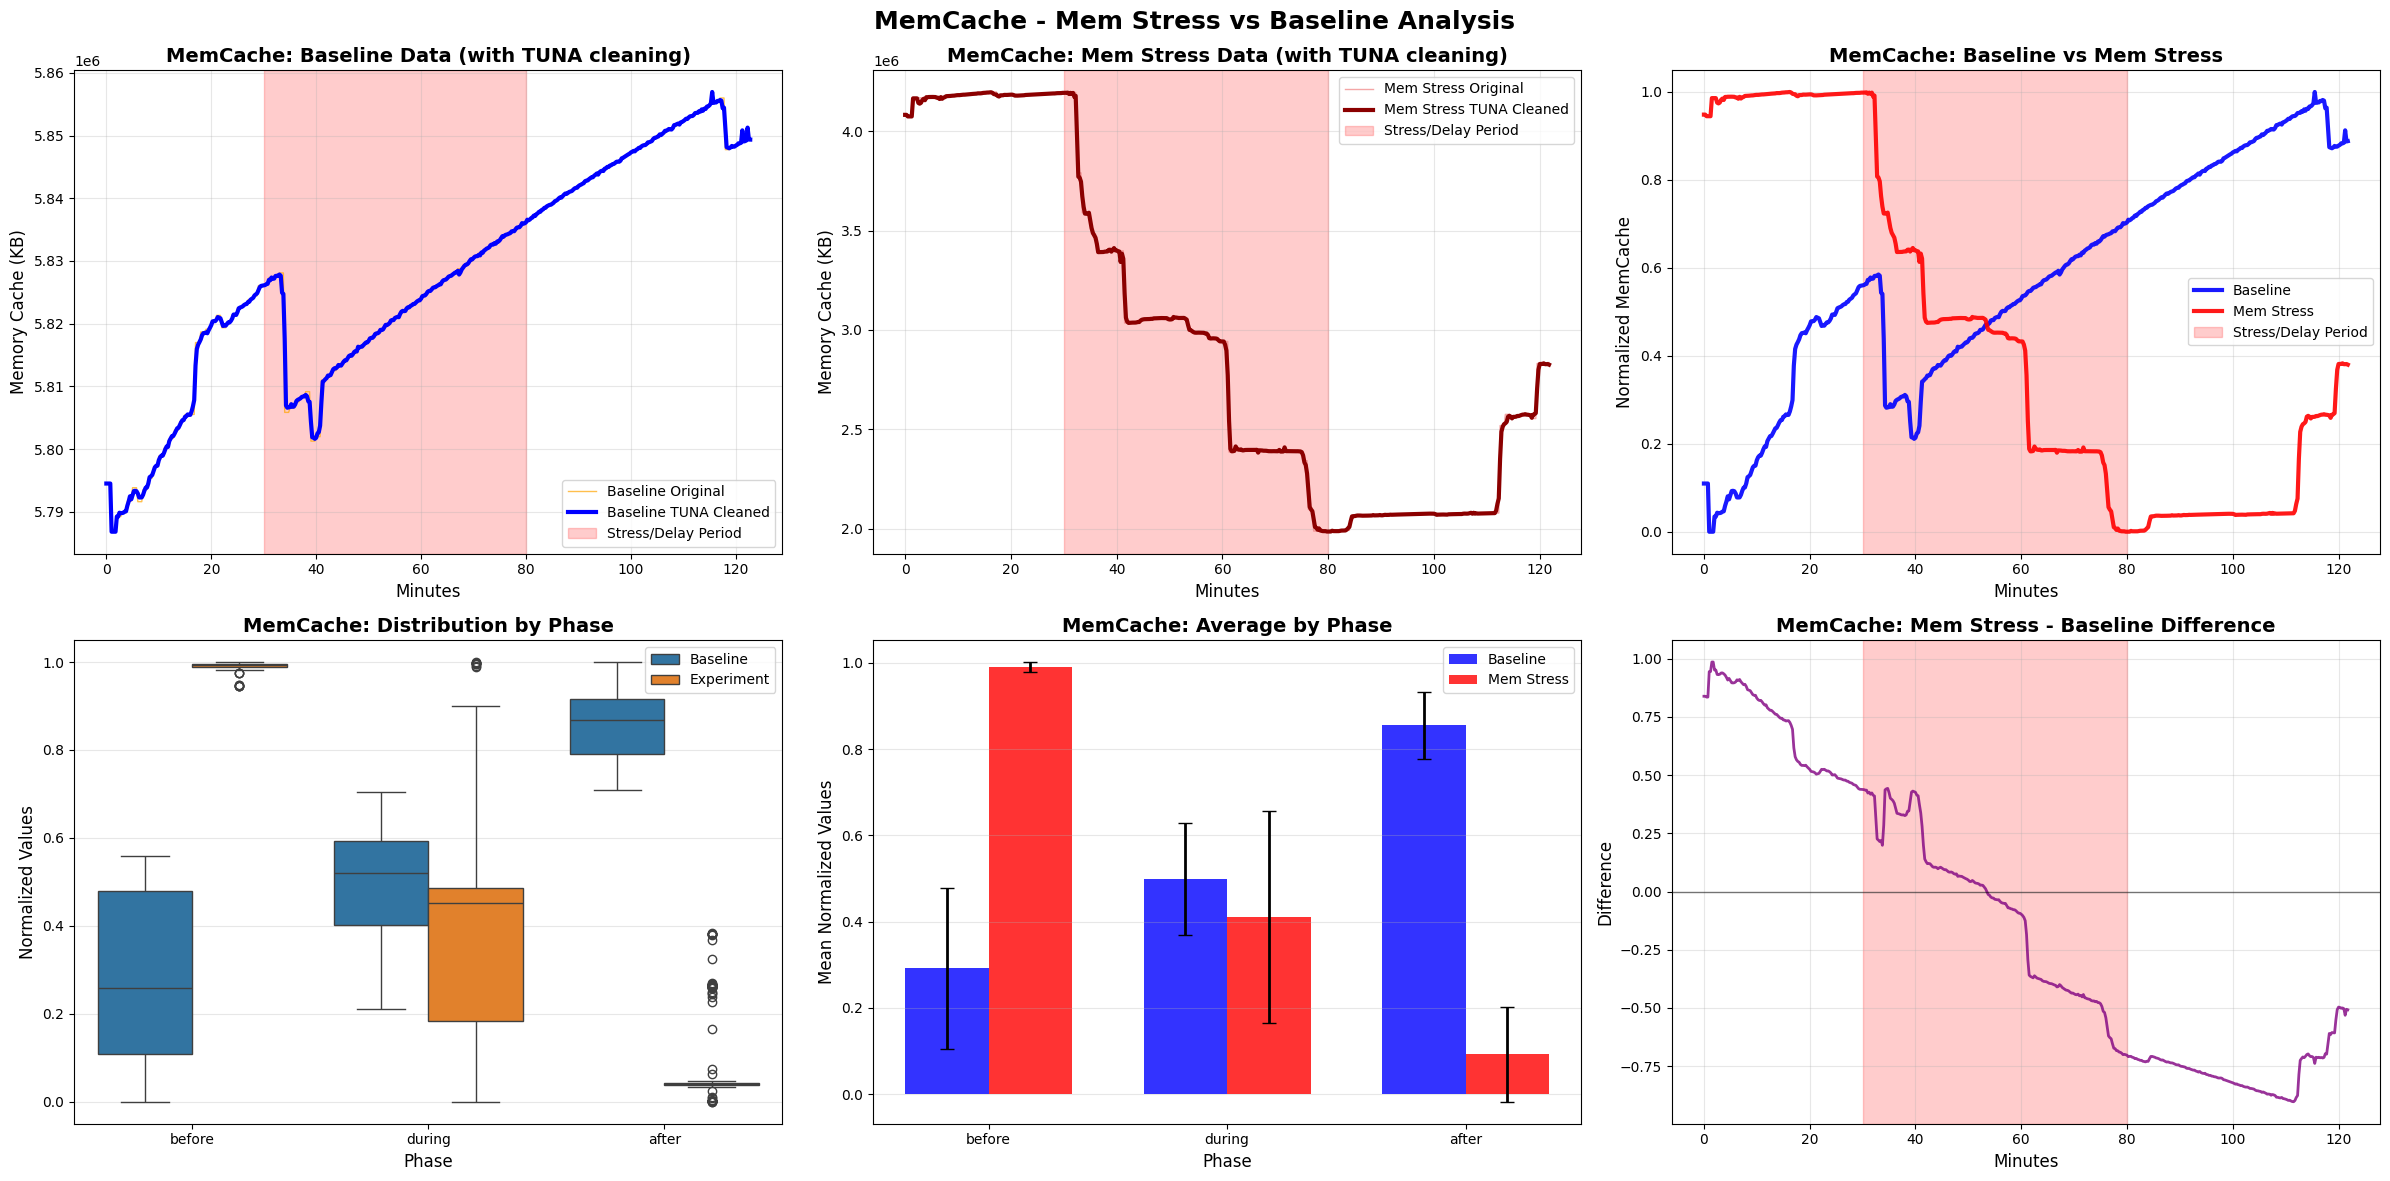


MEMCACHE - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 0 outliers removed
    Noise Reduction: 0.1%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.2%, Correlation: 0.999

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8550  0.0779  0.7082  1.0000
before  0.2917  0.1862  0.0000  0.5596
during  0.4994  0.1304  0.2113  0.7035

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0925  0.1100  0.0000  0.3829
before  0.9907  0.0113  0.9449  1.0000
during  0.4116  0.2458  0.0000  0.9990

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-41.05, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  4.47, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 73.10, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  : +239.60% (INCREASE)
  DURING  :  -17.58% (DECREASE)
  AFTER   :  -89.19% (DECREASE)

MEMORY METRICS DETAILS:
  Metri

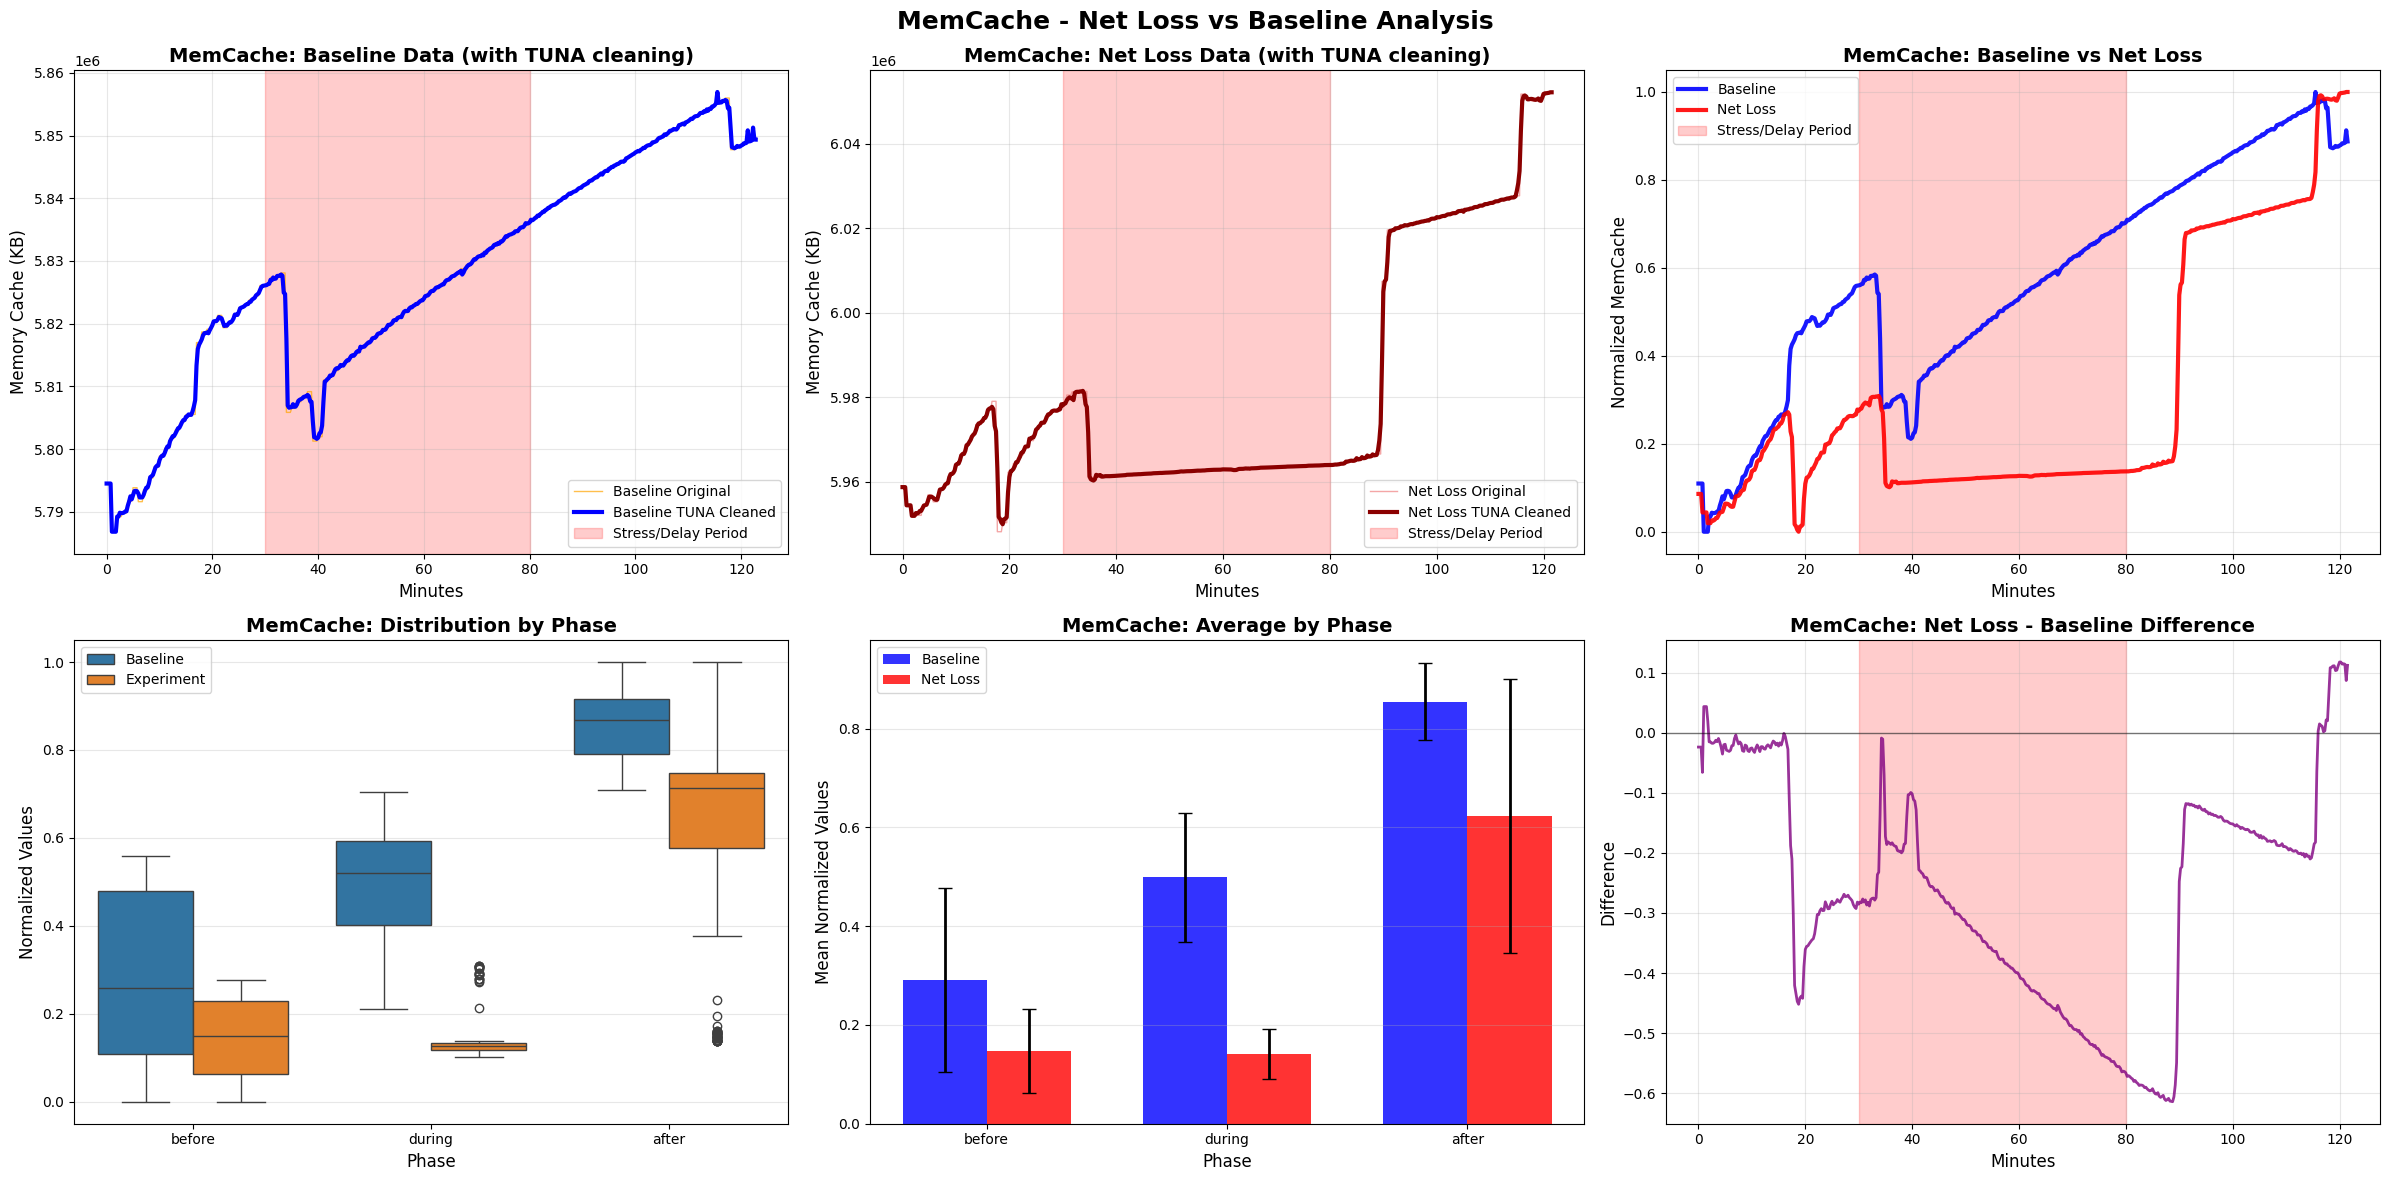


MEMCACHE - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.999
  BASELINE: 0 outliers removed
    Noise Reduction: 0.2%, Correlation: 0.999

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8548  0.0781  0.7082  1.0000
before  0.2917  0.1862  0.0000  0.5596
during  0.4994  0.1304  0.2113  0.7035

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6237  0.2774  0.1373  1.0000
before  0.1465  0.0852  0.0000  0.2778
during  0.1406  0.0507  0.1012  0.3087

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  7.77, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 36.35, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 10.33, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  -49.79% (DECREASE)
  DURING  :  -71.84% (DECREASE)
  AFTER   :  -27.04% (DECREASE)

MEMORY METRICS DETAILS:
  Metric: MemCa

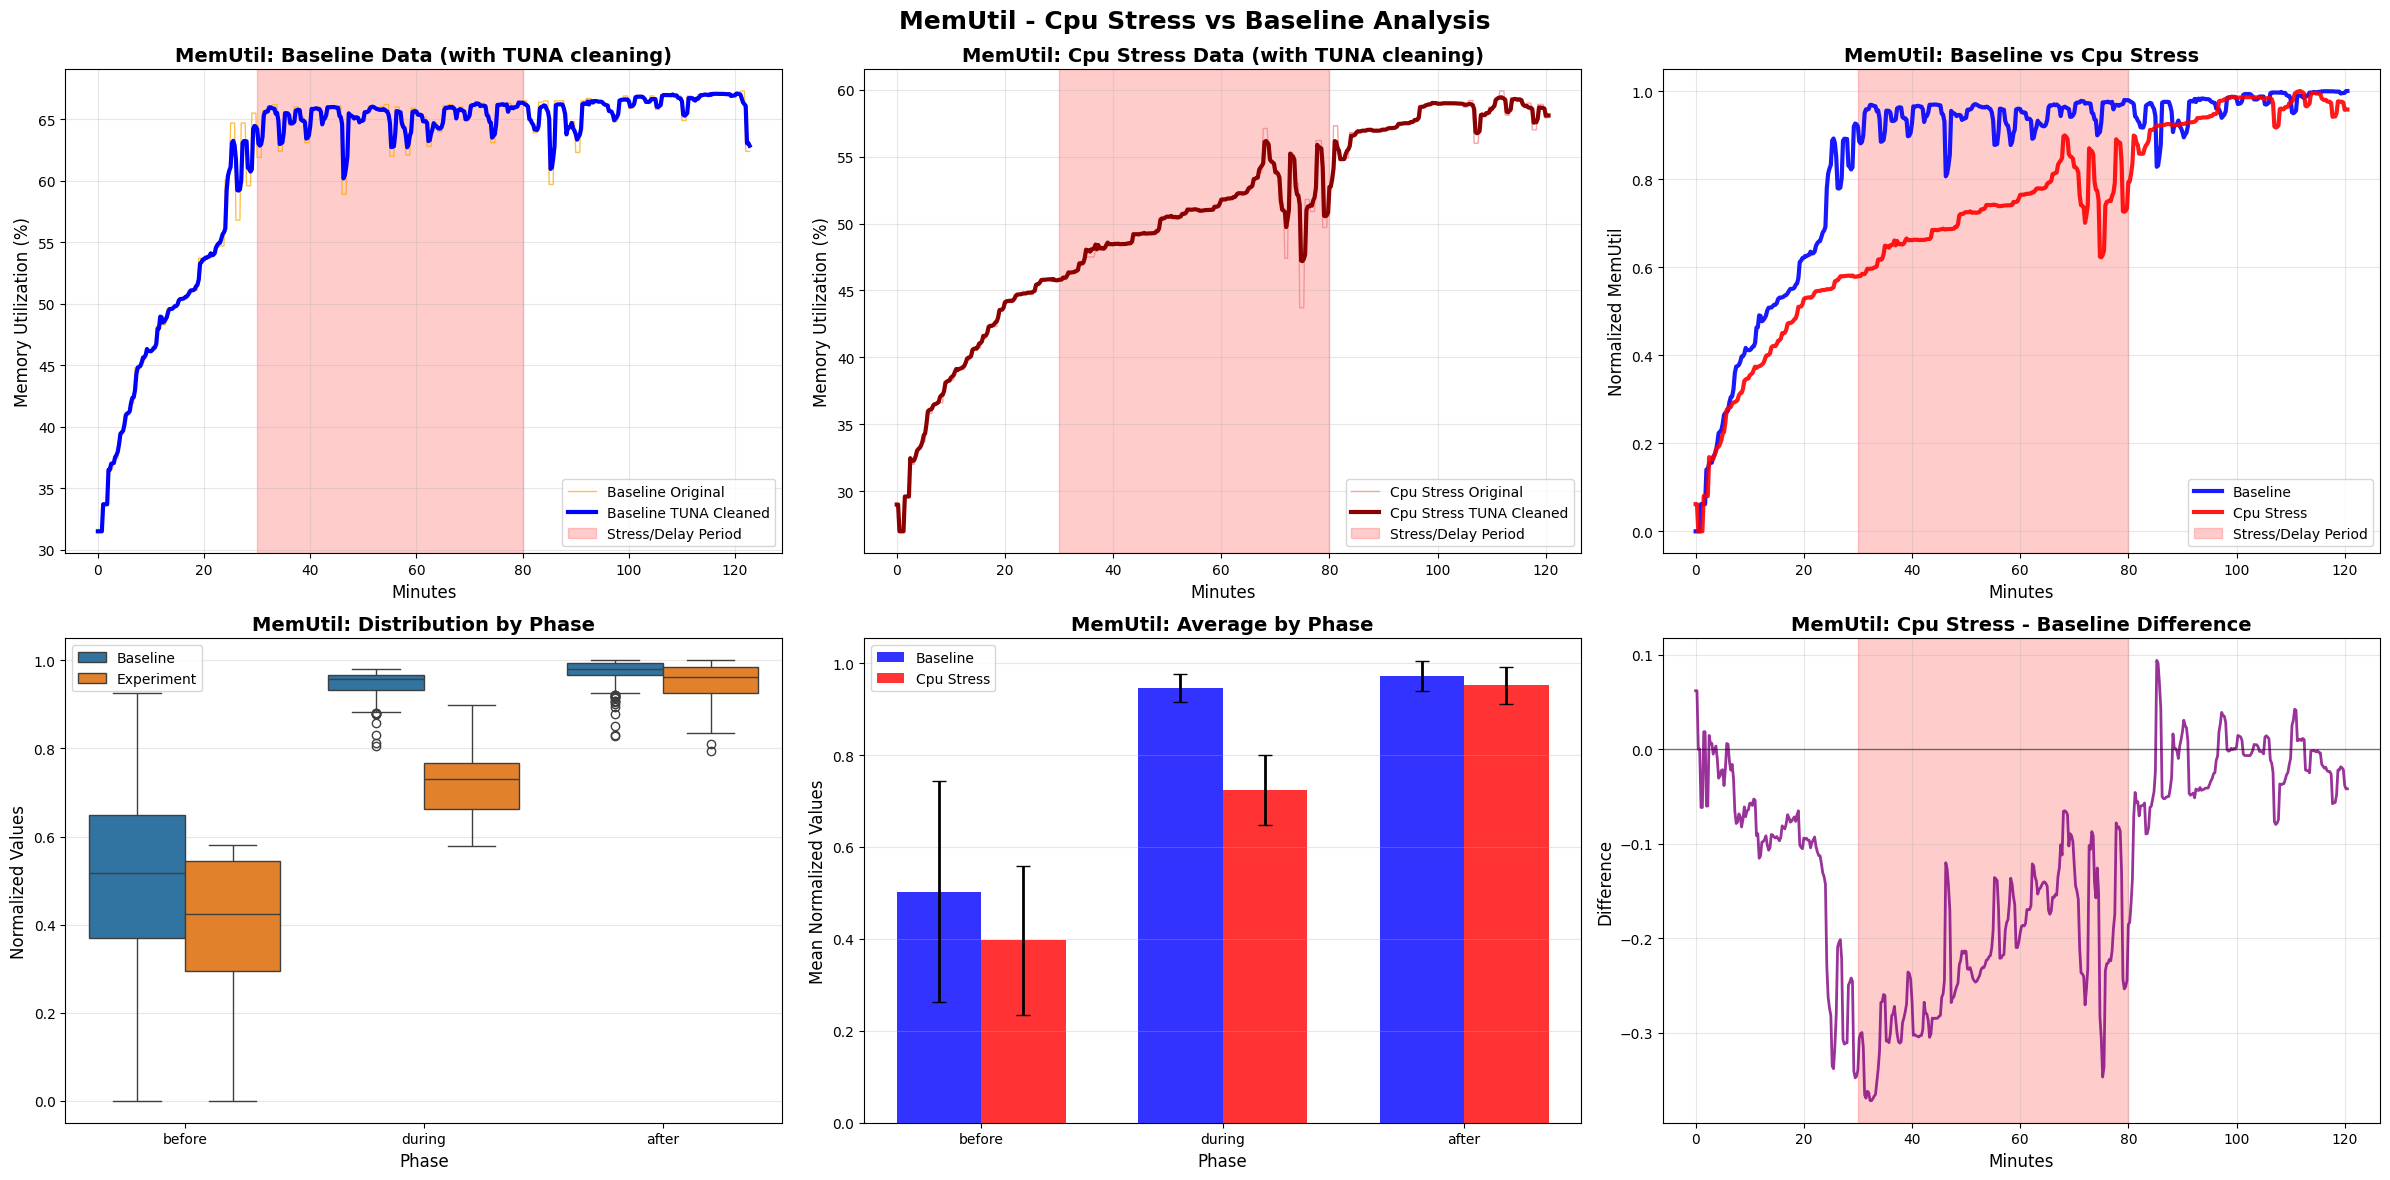


MEMUTIL - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: 1.0%, Correlation: 0.995
  BASELINE: 0 outliers removed
    Noise Reduction: 0.8%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9715  0.0321  0.8279  1.0000
before  0.5030  0.2413  0.0000  0.9261
during  0.9452  0.0308  0.8062  0.9796

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9515  0.0396  0.7943  1.0000
before  0.3967  0.1623  0.0000  0.5811
during  0.7245  0.0758  0.5795  0.8991

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  4.01, p=  0.0001 (SIGNIFICANT)
  DURING  : t= 38.24, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  5.00, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  -21.15% (DECREASE)
  DURING  :  -23.35% (DECREASE)
  AFTER   :   -2.06% (DECREASE)

MEMORY METRICS DETAILS:
  Metric

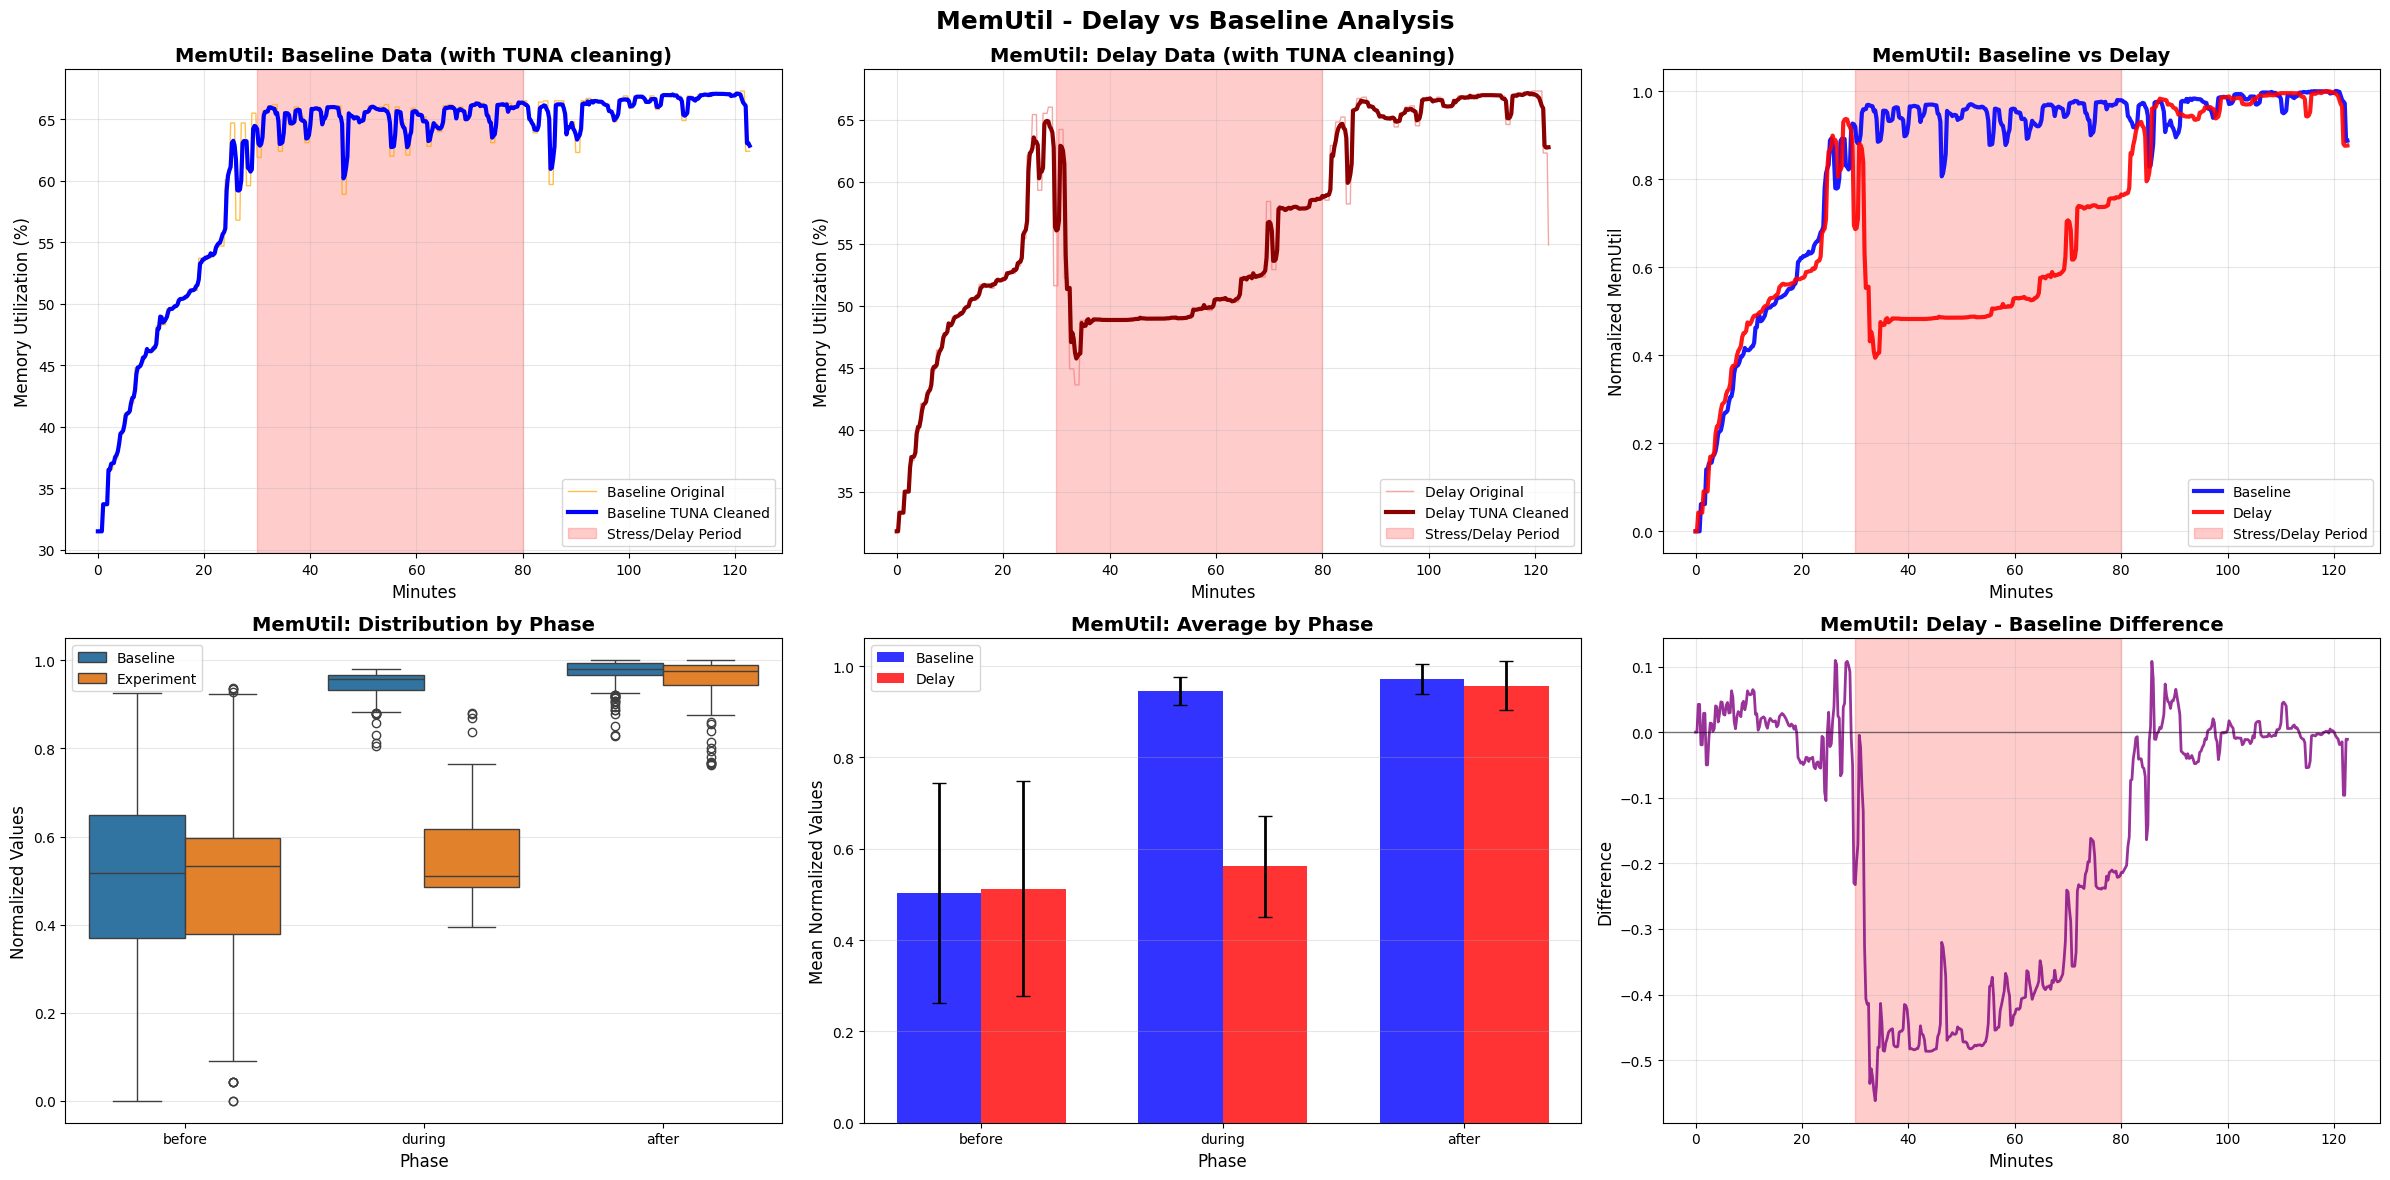


MEMUTIL - DELAY VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  DELAY: 0 outliers removed
    Noise Reduction: 1.5%, Correlation: 0.989
  BASELINE: 0 outliers removed
    Noise Reduction: 0.8%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9710  0.0328  0.8279  1.0000
before  0.5030  0.2413  0.0000  0.9261
during  0.9452  0.0308  0.8062  0.9796

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9571  0.0529  0.7634  1.0000
before  0.5120  0.2352  0.0000  0.9365
during  0.5612  0.1097  0.3942  0.8797

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -0.29, p=  0.7718 (NOT SIGNIFICANT)
  DURING  : t= 47.77, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  2.91, p=  0.0039 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :   +1.78% (INCREASE)
  DURING  :  -40.63% (DECREASE)
  AFTER   :   -1.43% (DECREASE)

MEMORY METRICS DETAILS:
  Metric: MemUtil
  Metr

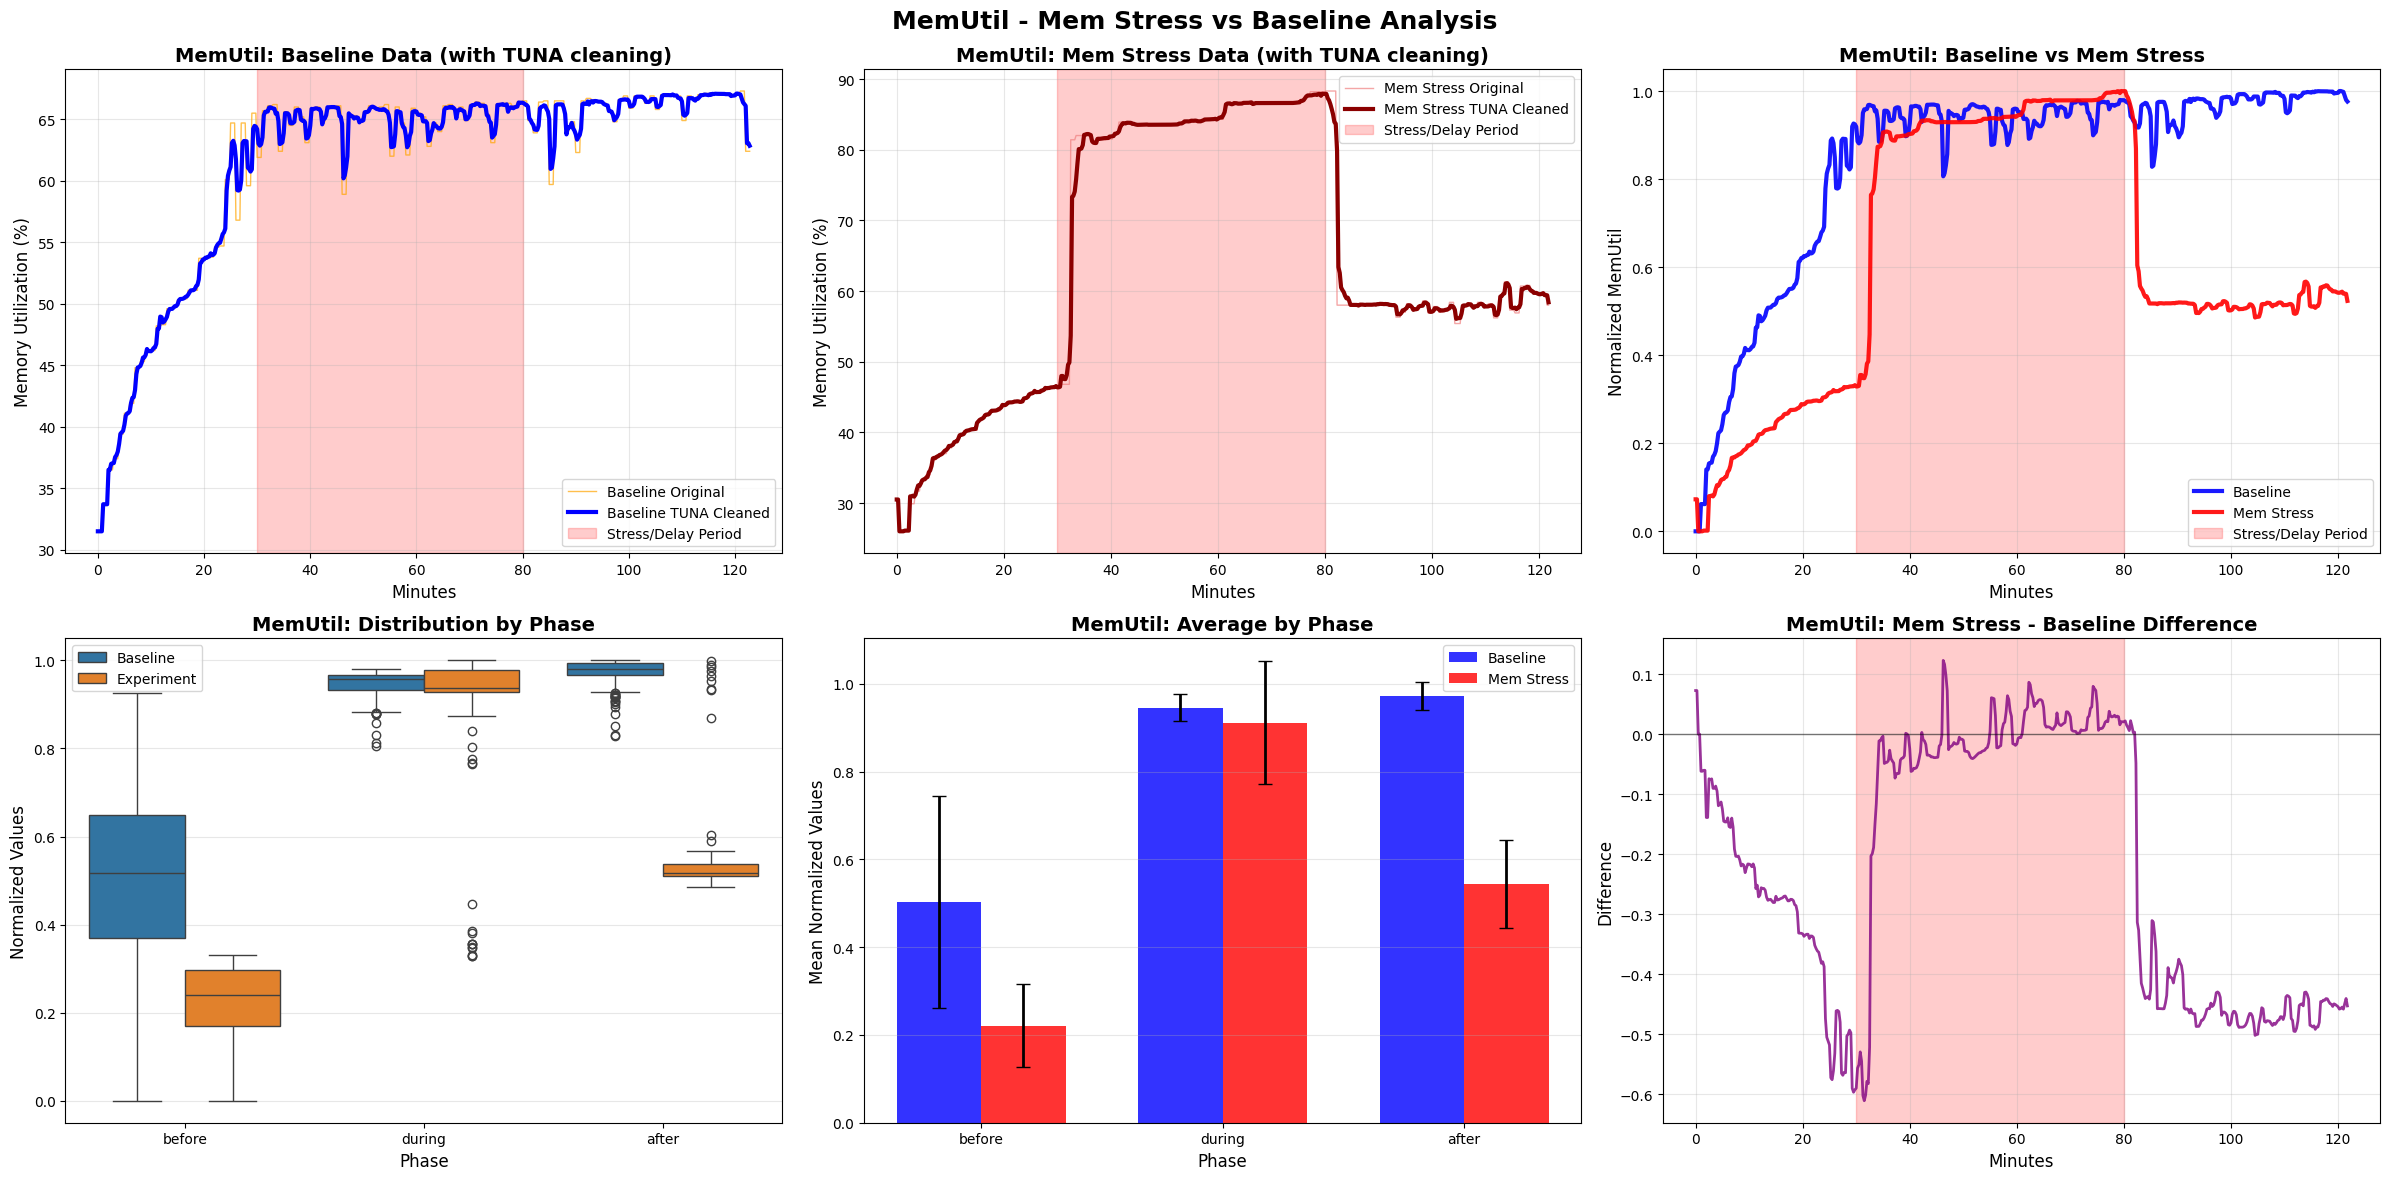


MEMUTIL - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 0 outliers removed
    Noise Reduction: 1.1%, Correlation: 0.995
  BASELINE: 0 outliers removed
    Noise Reduction: 0.8%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9720  0.0318  0.8279  1.0000
before  0.5030  0.2413  0.0000  0.9261
during  0.9452  0.0308  0.8062  0.9796

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5444  0.1007  0.4856  0.9997
before  0.2206  0.0944  0.0000  0.3319
during  0.9118  0.1391  0.3289  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 11.94, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  3.33, p=  0.0010 (SIGNIFICANT)
  AFTER   : t= 52.35, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -56.14% (DECREASE)
  DURING  :   -3.54% (DECREASE)
  AFTER   :  -43.99% (DECREASE)

MEMORY METRICS DETAILS:
  Metric

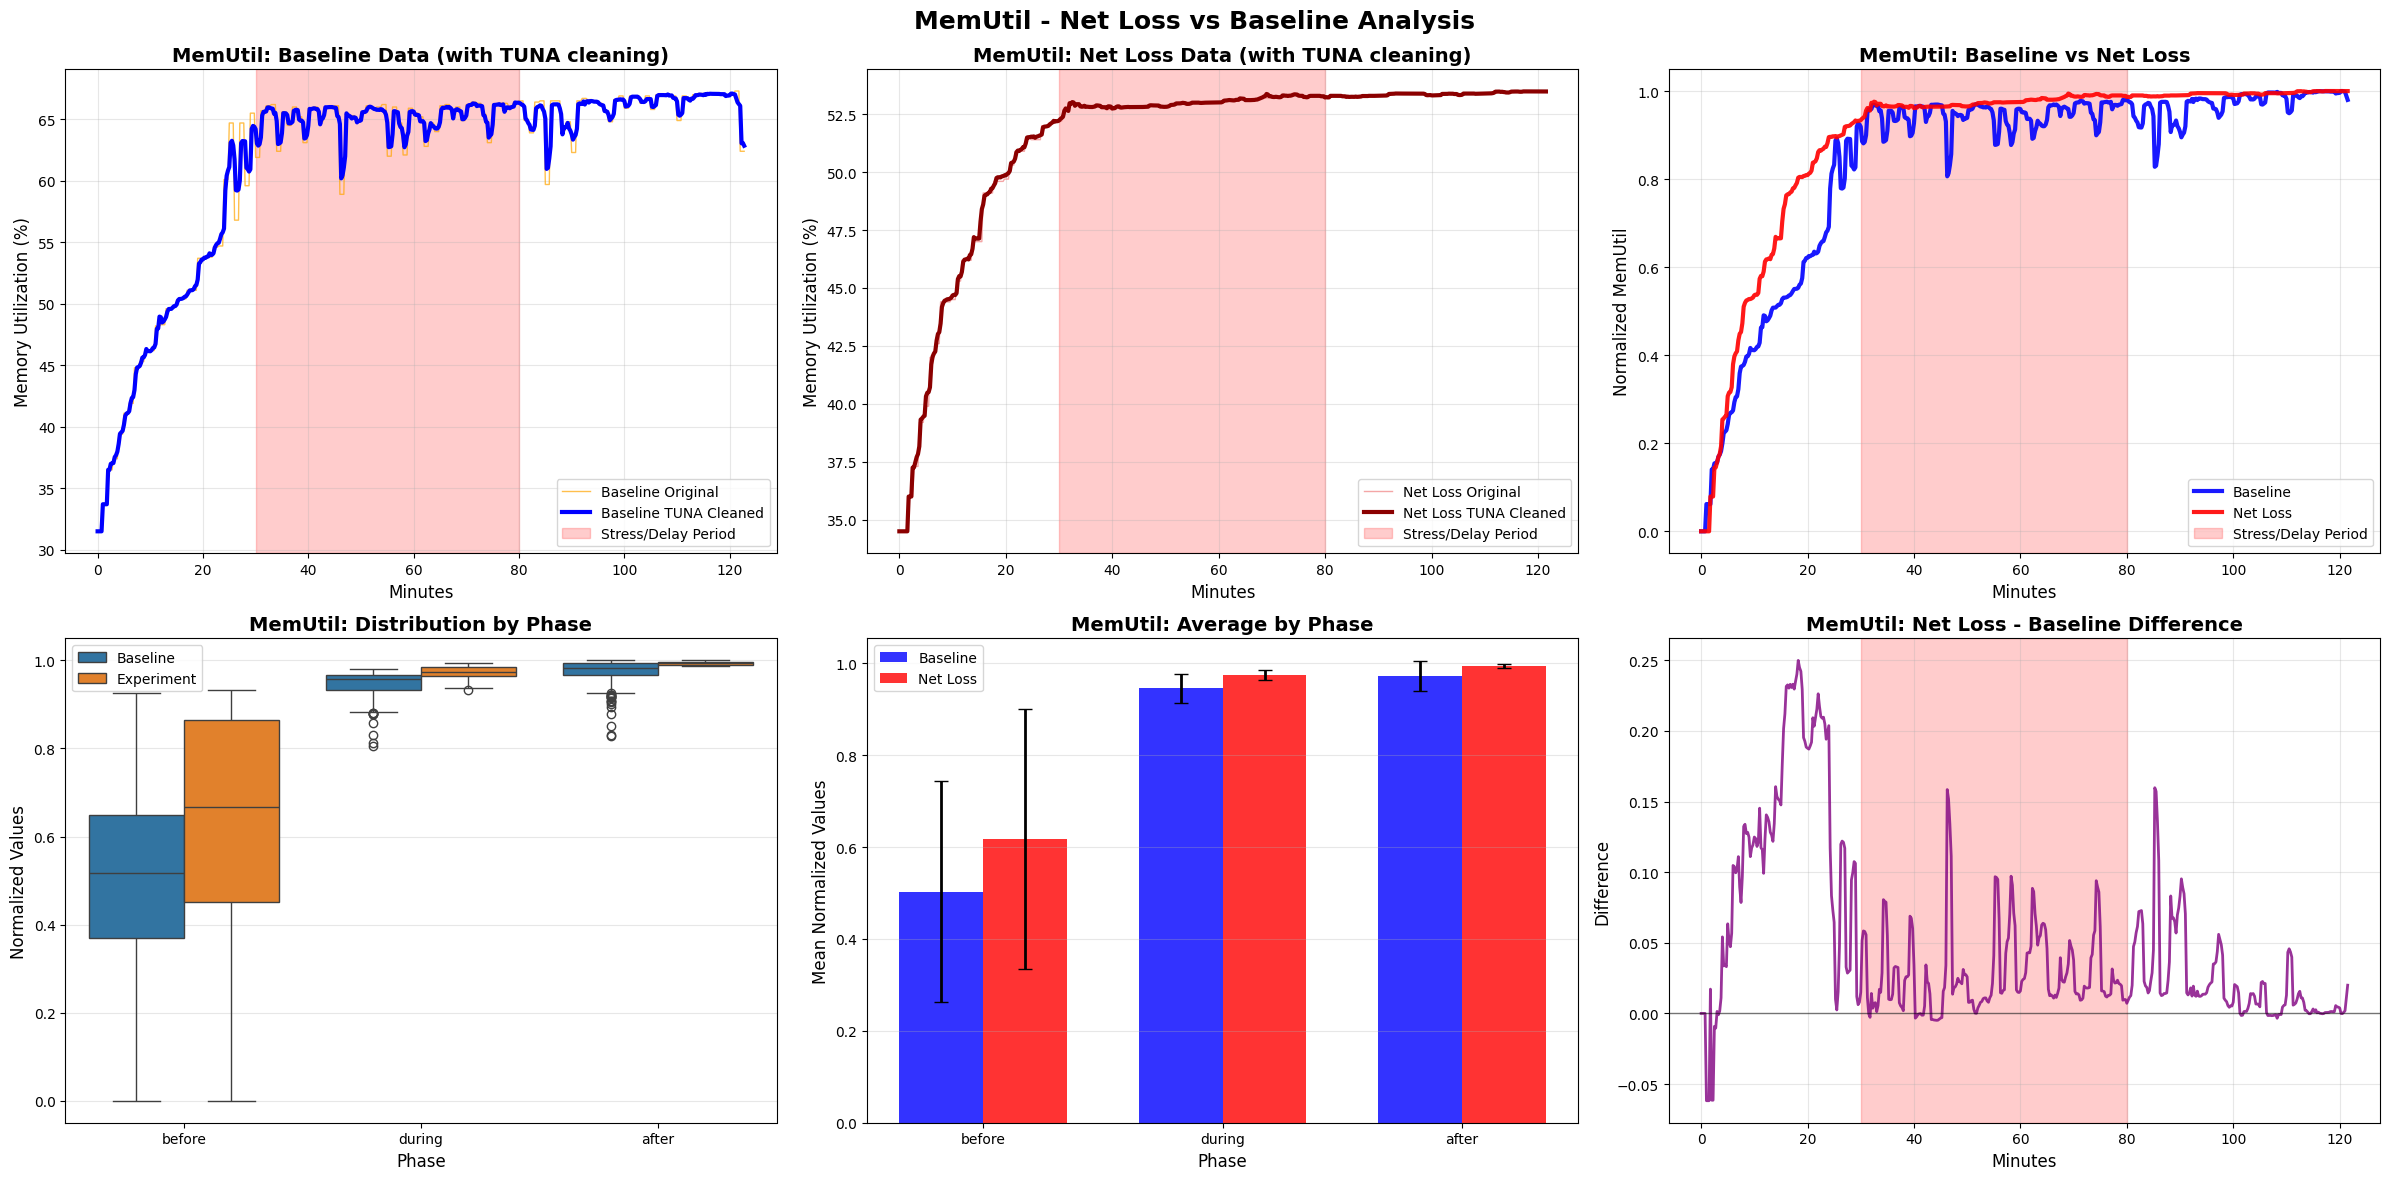


MEMUTIL - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 0.6%, Correlation: 0.999
  BASELINE: 0 outliers removed
    Noise Reduction: 0.8%, Correlation: 0.994

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9720  0.0319  0.8279  1.0000
before  0.5030  0.2413  0.0000  0.9261
during  0.9452  0.0308  0.8062  0.9796

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9940  0.0039  0.9863  1.0000
before  0.6179  0.2829  0.0000  0.9331
during  0.9745  0.0112  0.9338  0.9942

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -3.38, p=  0.0008 (SIGNIFICANT)
  DURING  : t=-12.71, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -8.86, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  +22.83% (INCREASE)
  DURING  :   +3.11% (INCREASE)
  AFTER   :   +2.27% (INCREASE)

MEMORY METRICS DETAILS:
  Metric: MemUti

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
import warnings
warnings.filterwarnings('ignore')

def extract_memory_values(df):
    """Extract memory values from single-column memory datasets"""
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        return df[value_cols[0]].values
    else:
        # If multiple columns, sum them
        return df[value_cols].sum(axis=1).values

def normalize_series(series):
    """Normalize a series to 0-1 range"""
    if len(series) == 0:
        return series
    
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series(np.zeros(len(series)), index=series.index if hasattr(series, 'index') else None)

def get_memory_y_axis_label(metric_name):
    """Get appropriate y-axis label based on memory metric name"""
    labels = {
        'MemAvailable': 'Memory Available (KB)',
        'MemCache': 'Memory Cache (KB)', 
        'MemUtil': 'Memory Utilization (%)',
        'Memory Utilization': 'Memory Utilization (%)',
        'Memory Cache': 'Memory Cache (KB)',
        'Memory Available': 'Memory Available (KB)',
        'Memory Usage': 'Memory Usage (KB)',
        'Memory Buffer': 'Memory Buffer (KB)',
        'Memory Free': 'Memory Free (KB)',
    }
    return labels.get(metric_name, 'Memory Value')

def analyze_and_plot_memory_comparison(metric_name, experiment_name, experiment_df, baseline_df, 
                                     tuna_results=None, delay_minutes=30, duration_minutes=50):
    """
    Create 6-plot comparison analysis for memory metrics between experiment and baseline
    """
    
    # Extract memory values
    experiment_values = extract_memory_values(experiment_df)
    baseline_values = extract_memory_values(baseline_df)
    
    # Get TUNA cleaned data if available
    experiment_cleaned = None
    baseline_cleaned = None
    experiment_outliers = None
    baseline_outliers = None
    
    if tuna_results and metric_name in tuna_results:
        if experiment_name in tuna_results[metric_name]:
            experiment_cleaned = tuna_results[metric_name][experiment_name]['cleaned']
            experiment_outliers = tuna_results[metric_name][experiment_name]['outliers']
        if 'baseline' in tuna_results[metric_name]:
            baseline_cleaned = tuna_results[metric_name]['baseline']['cleaned']
            baseline_outliers = tuna_results[metric_name]['baseline']['outliers']
    
    # Use cleaned data if available, otherwise original
    experiment_series = experiment_cleaned if experiment_cleaned is not None else experiment_values
    baseline_series = baseline_cleaned if baseline_cleaned is not None else baseline_values
    
    # Normalize data
    experiment_norm = normalize_series(pd.Series(experiment_series))
    baseline_norm = normalize_series(pd.Series(baseline_series))
    
    # Create combined dataframe for analysis
    min_length = min(len(experiment_norm), len(baseline_norm), 
                    len(experiment_df['Minutes']), len(baseline_df['Minutes']))
    
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm.iloc[:min_length],
        'Experiment': experiment_norm.iloc[:min_length],
        'Minutes': experiment_df['Minutes'].iloc[:min_length],
        'Baseline_Minutes': baseline_df['Minutes'].iloc[:min_length]
    })
    
    df_combined['difference'] = df_combined['Experiment'] - df_combined['Baseline']
    
    # Add phase information
    df_combined['phase'] = 'before'
    df_combined.loc[(df_combined['Minutes'] >= delay_minutes) & 
                   (df_combined['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df_combined.loc[df_combined['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    
    # Statistical analysis by phase
    stats_baseline = df_combined.groupby('phase')['Baseline'].agg(['mean', 'std', 'min', 'max'])
    stats_experiment = df_combined.groupby('phase')['Experiment'].agg(['mean', 'std', 'min', 'max'])
    
    # T-tests for statistical significance
    t_tests = {}
    available_phases = stats_baseline.index.tolist()
    
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            data = df_combined[df_combined['phase'] == phase]
            if len(data) > 1:
                t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['Experiment'].dropna())
                t_tests[phase] = {'t': t_stat, 'p': p_value}
            else:
                t_tests[phase] = {'t': 0, 'p': 1}
        else:
            t_tests[phase] = {'t': 0, 'p': 1, 'note': 'Phase not present in data'}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            baseline_mean = stats_baseline.loc[phase, 'mean']
            experiment_mean = stats_experiment.loc[phase, 'mean']
            if baseline_mean != 0:
                impact[phase] = ((experiment_mean - baseline_mean) / baseline_mean) * 100
            else:
                impact[phase] = 0
        else:
            impact[phase] = 0
    
    # Create the 6-plot visualization
    fig = plt.figure(figsize=(24, 12))
    
    # Get proper y-axis label
    y_label = get_memory_y_axis_label(metric_name)
    
    # 1. Baseline with/without TUNA cleaning
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df['Minutes'][:len(baseline_values)], baseline_values, 
             label='Baseline Original', color='orange', alpha=0.7, linewidth=1)
    
    if baseline_cleaned is not None:
        plt.plot(baseline_df['Minutes'][:len(baseline_cleaned)], baseline_cleaned, 
                 label='Baseline TUNA Cleaned', linewidth=3, color='blue')
        
        # Highlight outliers if available
        if baseline_outliers is not None:
            outlier_points = np.where(baseline_outliers)[0]
            if len(outlier_points) > 0:
                plt.scatter(baseline_df['Minutes'].iloc[outlier_points], 
                           baseline_values[outlier_points], 
                           c='red', s=15, alpha=0.7, label='Outliers', zorder=5)
        
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(baseline_df['Minutes'][:len(baseline_values)], baseline_values, 
                 label='Baseline', linewidth=3, color='blue')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: Baseline Data{title_suffix}', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. Experiment with/without TUNA cleaning
    plt.subplot(2, 3, 2)
    plt.plot(experiment_df['Minutes'][:len(experiment_values)], experiment_values, 
             label=f'{experiment_name.replace("_", " ").title()} Original', 
             alpha=0.7, color='lightcoral', linewidth=1)
    
    if experiment_cleaned is not None:
        plt.plot(experiment_df['Minutes'][:len(experiment_cleaned)], experiment_cleaned, 
                 label=f'{experiment_name.replace("_", " ").title()} TUNA Cleaned', 
                 linewidth=3, color='darkred')
        
        # Highlight outliers if available
        if experiment_outliers is not None:
            outlier_points = np.where(experiment_outliers)[0]
            if len(outlier_points) > 0:
                plt.scatter(experiment_df['Minutes'].iloc[outlier_points], 
                           experiment_values[outlier_points], 
                           c='red', s=15, alpha=0.7, label='Outliers', zorder=5)
        
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(experiment_df['Minutes'][:len(experiment_values)], experiment_values, 
                 label=f'{experiment_name.replace("_", " ").title()}', 
                 linewidth=3, color='darkred')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} Data{title_suffix}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison (normalized)
    plt.subplot(2, 3, 3)
    plt.plot(df_combined['Minutes'], df_combined['Baseline'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(df_combined['Minutes'], df_combined['Experiment'], 
             label=f'{experiment_name.replace("_", " ").title()}', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f"{metric_name}: Baseline vs {experiment_name.replace('_', ' ').title()}", 
              fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {metric_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'Experiment', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{metric_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases_to_plot = [p for p in ['before', 'during', 'after'] if p in available_phases]
    
    if len(phases_to_plot) > 0:
        x = np.arange(len(phases_to_plot))
        width = 0.35
        
        baseline_means = [stats_baseline.loc[p, 'mean'] for p in phases_to_plot]
        baseline_stds = [stats_baseline.loc[p, 'std'] for p in phases_to_plot]
        experiment_means = [stats_experiment.loc[p, 'mean'] for p in phases_to_plot]
        experiment_stds = [stats_experiment.loc[p, 'std'] for p in phases_to_plot]
        
        bars1 = plt.bar(x - width/2, baseline_means, width, 
                       label='Baseline', alpha=0.8, color='blue')
        bars2 = plt.bar(x + width/2, experiment_means, width, 
                       label=f'{experiment_name.replace("_", " ").title()}', alpha=0.8, color='red')
        
        plt.errorbar(x - width/2, baseline_means, yerr=baseline_stds, 
                    fmt='none', ecolor='black', capsize=5, linewidth=2)
        plt.errorbar(x + width/2, experiment_means, yerr=experiment_stds, 
                    fmt='none', ecolor='black', capsize=5, linewidth=2)
        
        plt.xticks(x, phases_to_plot)
    else:
        plt.text(0.5, 0.5, 'No phase data available', ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.title(f'{metric_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} - Baseline Difference', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{metric_name} - {experiment_name.replace("_", " ").title()} vs Baseline Analysis', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{metric_name.upper()} - {experiment_name.upper().replace('_', ' ')} VS BASELINE ANALYSIS")
    print(f"{'='*80}")
    
    # Print TUNA cleaning summary if available
    if tuna_results and metric_name in tuna_results:
        print(f"\nTUNA CLEANING SUMMARY:")
        if experiment_name in tuna_results[metric_name]:
            exp_stats = tuna_results[metric_name][experiment_name]['stats']
            print(f"  {experiment_name.upper().replace('_', ' ')}: {exp_stats['outliers']} outliers removed")
            print(f"    Noise Reduction: {exp_stats['noise_reduction']:.1f}%, Correlation: {exp_stats['correlation']:.3f}")
        
        if 'baseline' in tuna_results[metric_name]:
            base_stats = tuna_results[metric_name]['baseline']['stats']
            print(f"  BASELINE: {base_stats['outliers']} outliers removed")
            print(f"    Noise Reduction: {base_stats['noise_reduction']:.1f}%, Correlation: {base_stats['correlation']:.3f}")
    
    print(f"\nBASELINE STATISTICS BY PHASE:")
    if len(stats_baseline) > 0:
        print(stats_baseline.round(4))
    else:
        print("  No phase data available")
    
    print(f"\n{experiment_name.upper().replace('_', ' ')} STATISTICS BY PHASE:")
    if len(stats_experiment) > 0:
        print(stats_experiment.round(4))
    else:
        print("  No phase data available")
    
    print(f"\nSTATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        if 'note' in test:
            print(f"  {phase.upper():8}: {test['note']}")
        else:
            sig = "SIGNIFICANT" if test['p'] < 0.05 else "NOT SIGNIFICANT"
            print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n{experiment_name.upper().replace('_', ' ')} IMPACT:")
    for phase, change in impact.items():
        if change == 0 and phase not in available_phases:
            print(f"  {phase.upper():8}: Phase not present in data")
        else:
            direction = "INCREASE" if change > 0 else "DECREASE" if change < 0 else "NO CHANGE"
            print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    # Print memory metrics details
    print(f"\nMEMORY METRICS DETAILS:")
    print(f"  Metric: {metric_name}")
    print(f"  Metric type: {y_label}")
    print(f"  Data points analyzed: {len(df_combined)}")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_experiment': stats_experiment,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'tuna_info': {
            'experiment_cleaned': experiment_cleaned is not None,
            'baseline_cleaned': baseline_cleaned is not None
        }
    }

def run_comprehensive_memory_analysis(all_datasets, tuna_results=None, delay_minutes=30, duration_minutes=50):
    """
    Run comprehensive memory analysis for all metrics against their baselines
    """
    print(f"\n{'='*80}")
    print("COMPREHENSIVE MEMORY ANALYSIS")
    print(f"{'='*80}")
    print("Each memory metric will be compared to its own baseline")
    
    analysis_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"\n🔍 Analyzing {metric_name}...")
        analysis_results[metric_name] = {}
        
        baseline_df = experiments['baseline']
        
        for experiment_name, experiment_df in experiments.items():
            if experiment_name != 'baseline':
                print(f"\n📊 Comparing {metric_name}: {experiment_name} stress vs baseline")
                
                result = analyze_and_plot_memory_comparison(
                    metric_name=metric_name,
                    experiment_name=experiment_name,
                    experiment_df=experiment_df,
                    baseline_df=baseline_df,
                    tuna_results=tuna_results,
                    delay_minutes=delay_minutes,
                    duration_minutes=duration_minutes
                )
                
                analysis_results[metric_name][experiment_name] = result
    
    return analysis_results

# Run comprehensive analysis using existing tuna_results from previous cell
memory_results = run_comprehensive_memory_analysis(all_datasets, tuna_results, delay_minutes=30, duration_minutes=50)

# Or analyze a specific memory metric:
# specific_result = analyze_and_plot_memory_comparison(
#     metric_name='MemUtil',
#     experiment_name='cpu_stress',
#     experiment_df=all_datasets['MemUtil']['cpu_stress'],
#     baseline_df=all_datasets['MemUtil']['baseline'],
#     tuna_results=tuna_results,
#     delay_minutes=30,
#     duration_minutes=50
# )